# Junyi Analysis

**資料來源**：[Kaggle：Junyi Academy Online Learning Activity Dataset](https://www.kaggle.com/junyiacademy/learning-activity-public-dataset-by-junyi-academy)

**資料簡述**：從2018/08到2019/07期間，有7萬多名的使用者，使用均一平台學習，共1600萬多筆作答紀錄。

- Info_Content：習題靜態資料（例如：課目/年級/難度...）

- Info_UserData：使用者靜態資料（例如：年級/性別/縣市/能量數...)

- Log_Problem：作答紀錄動態資料（例如：答對與否/作答時間/是否按提示...)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
Info_Content=pd.read_csv('Info_Content.csv')
Info_UserData=pd.read_csv('Info_UserData.csv')
Log_Problem=pd.read_csv('Log_Problem.csv')

In [3]:
Info_Content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ucid                 1330 non-null   object
 1   content_pretty_name  1330 non-null   object
 2   content_kind         1330 non-null   object
 3   difficulty           1330 non-null   object
 4   subject              1330 non-null   object
 5   learning_stage       1330 non-null   object
 6   level1_id            1330 non-null   object
 7   level2_id            1330 non-null   object
 8   level3_id            1330 non-null   object
 9   level4_id            1330 non-null   object
dtypes: object(10)
memory usage: 104.0+ KB


In [4]:
Info_UserData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72758 entries, 0 to 72757
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   uuid                  72758 non-null  object
 1   gender                32905 non-null  object
 2   points                72758 non-null  int64 
 3   badges_cnt            72758 non-null  int64 
 4   first_login_date_TW   72758 non-null  object
 5   user_grade            72758 non-null  int64 
 6   user_city             72758 non-null  object
 7   has_teacher_cnt       72758 non-null  int64 
 8   is_self_coach         72758 non-null  bool  
 9   has_student_cnt       72758 non-null  int64 
 10  belongs_to_class_cnt  72758 non-null  int64 
 11  has_class_cnt         72758 non-null  int64 
dtypes: bool(1), int64(7), object(4)
memory usage: 6.2+ MB


In [5]:
Log_Problem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16217311 entries, 0 to 16217310
Data columns (total 14 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   timestamp_TW                     object
 1   uuid                             object
 2   ucid                             object
 3   upid                             object
 4   problem_number                   int64 
 5   exercise_problem_repeat_session  int64 
 6   is_correct                       bool  
 7   total_sec_taken                  int64 
 8   total_attempt_cnt                int64 
 9   used_hint_cnt                    int64 
 10  is_hint_used                     bool  
 11  is_downgrade                     object
 12  is_upgrade                       object
 13  level                            int64 
dtypes: bool(2), int64(6), object(6)
memory usage: 1.5+ GB


# Data1：Info_UserData （使用者資料）

In [6]:
Info_UserData

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
0,Y2RcCdmUJAYPUAIDElo4nE9KrkLLFzUIRdexG+ipaZQ=,NaN,18300,1,2019-01-24,1,kh,0,False,0,0,0
1,lw/Rchfvl9q1UDaQRmeE6QJDJeXAK7nt56RvUvqxD/8=,NaN,6468,0,2019-01-24,1,ntpc,1,False,0,1,0
2,ncVYyCw3osV77X9M+4NbI7LvBR5UiB4ix6Ca+baQArA=,male,4703,0,2019-01-24,1,tp,0,False,0,0,0
3,J7Tbo1x2WtRpPuXeX7lWT9tkzWlSJeubl8UWjNmHh+4=,NaN,15525,1,2019-01-24,2,ntpc,0,False,0,0,0
4,qijKzROzz1LmCaCxHJ3mOBOtjW/q4kW80tnpPmXHVYQ=,NaN,7945,0,2019-01-24,2,km,1,False,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
72753,ESAeVlIpxgtgb2EtZb8K+plFLqKch5ffAgRzKnQqTQ4=,NaN,2393,2,2019-01-23,10,tc,1,False,0,1,0
72754,DBQkIr4grFmnG2Aml3+haxfHbxp0kgerOxJfJ9JEWpE=,NaN,1283,0,2019-01-23,10,chc,0,False,0,0,0
72755,2KR+J0mQ2231WhAzulTMJ7ZuyKj43bPYbSdefVwOeQc=,NaN,5059,2,2019-01-23,10,tp,0,False,0,0,0
72756,BAhs3hEK/PGa1ccNoEahYZsn+dOwRT3tPiojc34vMjQ=,female,17030,2,2019-01-23,11,tp,0,False,0,0,0


In [7]:
Info_UserData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72758 entries, 0 to 72757
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   uuid                  72758 non-null  object
 1   gender                32905 non-null  object
 2   points                72758 non-null  int64 
 3   badges_cnt            72758 non-null  int64 
 4   first_login_date_TW   72758 non-null  object
 5   user_grade            72758 non-null  int64 
 6   user_city             72758 non-null  object
 7   has_teacher_cnt       72758 non-null  int64 
 8   is_self_coach         72758 non-null  bool  
 9   has_student_cnt       72758 non-null  int64 
 10  belongs_to_class_cnt  72758 non-null  int64 
 11  has_class_cnt         72758 non-null  int64 
dtypes: bool(1), int64(7), object(4)
memory usage: 6.2+ MB


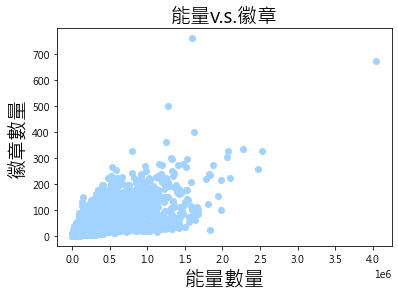

In [8]:
plt.scatter(Info_UserData.points,Info_UserData.badges_cnt,color="#A2D2FF")
plt.xlabel("能量數量",fontsize=20)
plt.ylabel("徽章數量",fontsize=20)
plt.title("能量v.s.徽章",fontsize=20)
plt.show()

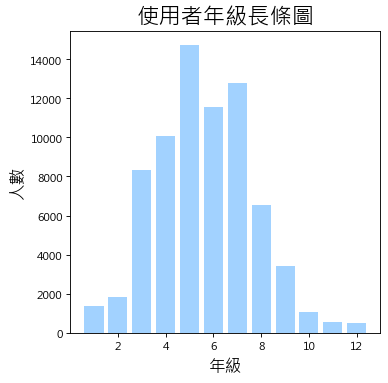

In [9]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(5, 5), dpi=80)
plt.bar(Info_UserData["user_grade"].value_counts().index,Info_UserData["user_grade"].value_counts(),color="#A2D2FF")
plt.title("使用者年級長條圖",fontsize=20)
plt.xlabel("年級",fontsize=15)
plt.ylabel("人數",fontsize=15)
plt.show()

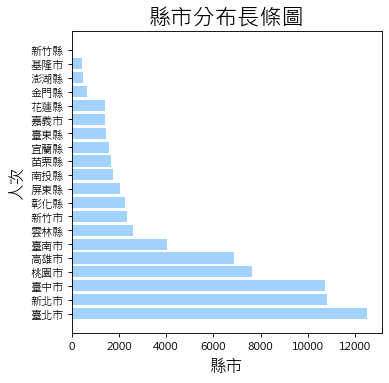

In [10]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(5, 5), dpi=80)
plt.barh(["臺北市","新北市","臺中市","桃園市","高雄市","臺南市","雲林縣","新竹市","彰化縣","屏東縣","南投縣","苗栗縣","宜蘭縣","臺東縣","嘉義市","花蓮縣","金門縣","澎湖縣","基隆市","新竹縣"],Info_UserData["user_city"].value_counts(),color="#A2D2FF")
plt.title("縣市分布長條圖",fontsize=20)
plt.xlabel("縣市",fontsize=15)
plt.ylabel("人次",fontsize=15)
plt.show()

In [11]:
people_count=Info_UserData.pivot_table(index=["user_city"],columns='user_grade', aggfunc={'user_grade':'size'}, fill_value=0)
people_count.columns=[x for x in range(1,13)]
people_count.reset_index()

,user_city,1,2,3,4,5,6,7,8,9,10,11,12
0,chc,29,37,162,282,458,396,437,321,101,22,14,10
1,cy,29,26,112,344,291,207,216,112,43,16,11,8
2,hc,34,22,173,244,607,250,521,315,119,51,16,9
3,hlc,6,59,231,107,182,216,288,179,76,24,15,17
4,ilc,26,35,699,308,206,84,117,67,25,12,7,8
5,kh,151,181,745,965,1364,954,1577,518,214,85,73,61
6,kl,7,7,22,57,107,52,60,66,54,14,10,1
7,km,19,18,118,95,144,65,44,47,105,1,0,2
8,lj,1,1,2,18,12,5,2,2,0,1,4,0
9,ml,14,24,139,225,292,185,387,228,108,31,18,11


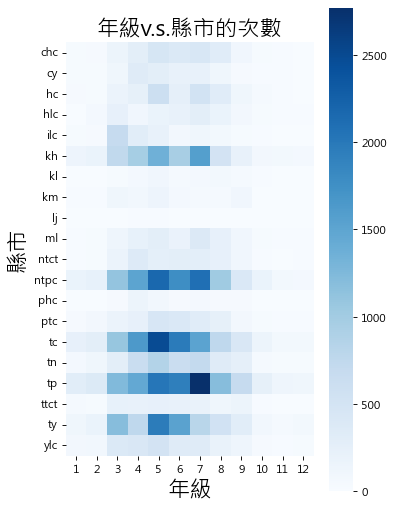

In [12]:
people_count=Info_UserData.pivot_table(index=["user_city"],columns='user_grade', aggfunc={'user_grade':'size'}, fill_value=0)
people_count.columns=[x for x in range(1,13)]
figure(figsize=(5, 8), dpi=80)
sns.heatmap(data=people_count,square=True, cmap="Blues") 
plt.xlabel("年級",fontsize=20)
plt.ylabel("縣市",fontsize=20)
plt.title("年級v.s.縣市的次數",fontsize=20)
plt.show()

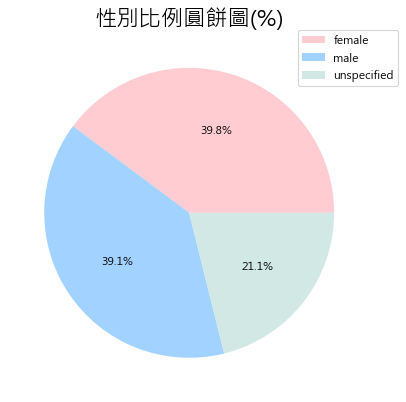

In [13]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=80)
plt.pie(Info_UserData["gender"].value_counts(),colors=["#FFCCD2","#A2D2FF","#D1E8E4"],autopct="%1.1f%%")
plt.title("性別比例圓餅圖(%)",fontsize=20)
plt.legend(loc=(0.8,0.85),labels=Info_UserData["gender"].value_counts().index)
plt.show()

In [14]:
City_learning_rate_points=Info_UserData.groupby("user_city").points.describe().sort_values("mean",ascending=False).reset_index()
Grade_learning_rate_points=Info_UserData.groupby("user_grade").points.describe().sort_values("mean",ascending=False).reset_index()
City_learning_rate_badges_cnt=Info_UserData.groupby("user_city").badges_cnt.describe().sort_values("mean",ascending=False).reset_index()
Grade_learning_rate_badges_cnt=Info_UserData.groupby("user_grade").badges_cnt.describe().sort_values("mean",ascending=False).reset_index()

In [15]:
display(City_learning_rate_points)
display(City_learning_rate_badges_cnt)

,user_city,count,mean,std,min,25%,50%,75%,max
0,km,658.00,242282.38,287158.35,64.00,34208.75,125546.00,346213.50,1679410.00
1,kl,457.00,122778.42,292492.23,75.00,7327.00,18345.00,61718.00,1581249.00
2,ml,1662.00,92056.63,186333.83,20.00,7508.25,25147.00,95297.00,1811271.00
3,ttct,1435.00,85662.53,161552.46,34.00,8192.50,25725.00,76171.50,1879354.00
4,ilc,1594.00,73488.11,111287.04,65.00,11618.25,33479.00,87664.50,1126276.00
5,ty,7615.00,73172.56,124898.12,1.00,8511.00,28800.00,90329.50,2268567.00
6,cy,1415.00,72197.86,126732.40,12.00,6855.00,21750.00,82272.50,1979716.00
7,hc,2361.00,69601.91,126727.49,8.00,7640.00,28740.00,74962.00,1486703.00
8,ptc,2064.00,68936.15,109031.81,44.00,7875.00,31151.50,85798.00,2069024.00
9,ntpc,10808.00,65038.86,135663.64,4.00,5685.00,18199.00,63866.25,2059589.00


,user_city,count,mean,std,min,25%,50%,75%,max
0,km,658.00,24.29,27.26,0.00,6.00,16.00,32.00,251.00
1,kl,457.00,17.71,44.18,0.00,1.00,3.00,10.00,301.00
2,ml,1662.00,16.50,34.42,0.00,1.00,4.00,16.00,360.00
3,ttct,1435.00,13.46,26.78,0.00,1.00,4.00,13.00,271.00
4,cy,1415.00,11.49,22.25,0.00,0.00,3.00,12.00,209.00
5,ty,7615.00,11.38,19.04,0.00,1.00,4.00,14.00,333.00
6,ptc,2064.00,11.25,19.43,0.00,1.00,4.00,14.00,325.00
7,hc,2361.00,11.22,20.99,0.00,1.00,4.00,13.00,277.00
8,hlc,1400.00,10.81,19.09,0.00,1.00,4.00,13.00,271.00
9,ilc,1594.00,9.51,15.35,0.00,1.00,4.00,11.00,144.00


In [16]:
display(Grade_learning_rate_points)
display(Grade_learning_rate_badges_cnt)

,user_grade,count,mean,std,min,25%,50%,75%,max
0,5,14720.00,83428.05,159525.28,6.00,8084.75,28422.00,88464.75,4047528.00
1,3,8324.00,62920.00,112253.19,12.00,5625.00,19684.00,71198.25,1787744.00
2,6,11568.00,60765.99,122541.83,13.00,6135.00,19214.00,63502.00,2519566.00
3,4,10052.00,59113.52,114143.77,20.00,5850.00,18655.00,60118.75,2105792.00
4,9,3436.00,56360.91,109634.96,4.00,5345.25,16489.00,56165.50,1581249.00
5,7,12760.00,56268.00,113164.40,3.00,5901.75,18360.50,55154.75,1979716.00
6,2,1815.00,56228.75,85194.39,31.00,9802.50,27320.00,68235.00,1104563.00
7,8,6533.00,55374.77,112677.67,4.00,6253.00,19635.00,57509.00,1534651.00
8,12,524.00,49150.95,118205.16,6.00,4550.25,14677.00,48407.75,1401024.00
9,11,570.00,46498.70,99370.63,33.00,4368.75,15844.00,43507.00,1589782.00


,user_grade,count,mean,std,min,25%,50%,75%,max
0,5,14720.00,11.83,21.92,0.00,1.00,4.00,14.00,673.00
1,8,6533.00,10.89,22.41,0.00,0.00,3.00,12.00,498.00
2,9,3436.00,10.50,20.85,0.00,0.00,3.00,11.00,297.00
3,6,11568.00,9.57,17.64,0.00,0.00,3.00,11.00,327.00
4,11,570.00,9.51,34.88,0.00,0.00,2.00,9.00,760.00
5,7,12760.00,9.37,19.00,0.00,0.00,3.00,10.00,398.00
6,10,1068.00,9.16,21.74,0.00,0.00,2.00,8.00,229.00
7,12,524.00,9.13,23.20,0.00,0.00,2.00,9.00,271.00
8,3,8324.00,7.95,15.37,0.00,0.00,2.00,9.00,251.00
9,2,1815.00,7.51,13.47,0.00,1.00,3.00,9.00,215.00


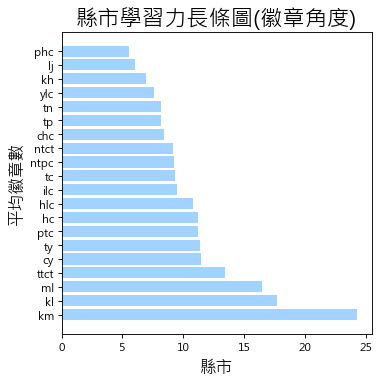

In [17]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(5, 5), dpi=80)
plt.barh(City_learning_rate_badges_cnt["user_city"],City_learning_rate_badges_cnt["mean"],color="#A2D2FF")
plt.title("縣市學習力長條圖(徽章角度)",fontsize=20)
plt.xlabel("縣市",fontsize=15)
plt.ylabel("平均徽章數",fontsize=15)
plt.show()

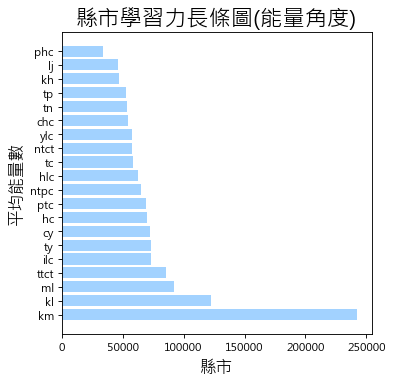

In [18]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(5, 5), dpi=80)
plt.barh(City_learning_rate_points["user_city"],City_learning_rate_points["mean"],color="#A2D2FF")
plt.title("縣市學習力長條圖(能量角度)",fontsize=20)
plt.xlabel("縣市",fontsize=15)
plt.ylabel("平均能量數",fontsize=15)
plt.show()

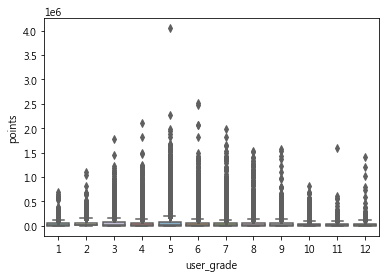

In [19]:
sns.boxplot(x="user_grade", y="points",data=Info_UserData, palette="Set3")
plt.show()

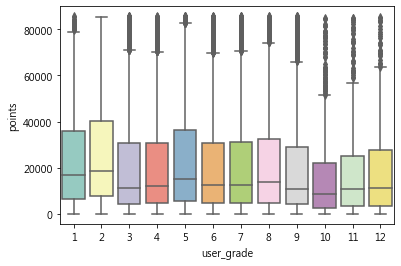

In [20]:
sns.boxplot(x="user_grade", y="points",data=Info_UserData[Info_UserData.points<=Info_UserData.points.quantile(0.8)], palette="Set3")
plt.show()

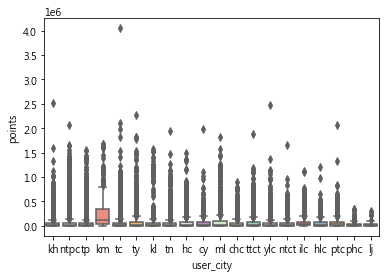

In [21]:
sns.boxplot(x="user_city", y="points",data=Info_UserData, palette="Set3")
plt.show()

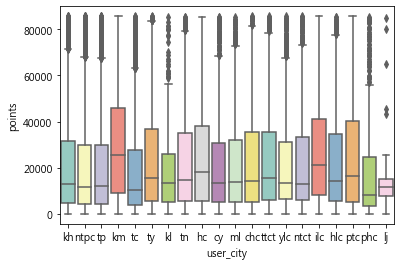

In [22]:
sns.boxplot(x="user_city", y="points",data=Info_UserData[Info_UserData.points<=Info_UserData.points.quantile(0.8)], palette="Set3")
plt.show()

# 進入均一時間軸

In [23]:
import re
each_day_cnt=Info_UserData.groupby("first_login_date_TW").uuid.count()
cumsum=each_day_cnt.cumsum()
moving_mean=each_day_cnt.rolling(window =7).mean()
timeline=pd.concat([each_day_cnt,cumsum,moving_mean],axis=1).reset_index()
timeline.columns=["first_login_date_TW","cnt","sum_cnt","SMA"]
timeline["date"]=timeline["first_login_date_TW"].str.extract(r"((?<=-).+(?=))")

In [24]:
timeline["sum_cnt"]

0        165
1        328
2        478
3        536
4        616
       ...  
360    72357
361    72394
362    72573
363    72706
364    72758
Name: sum_cnt, Length: 365, dtype: int64

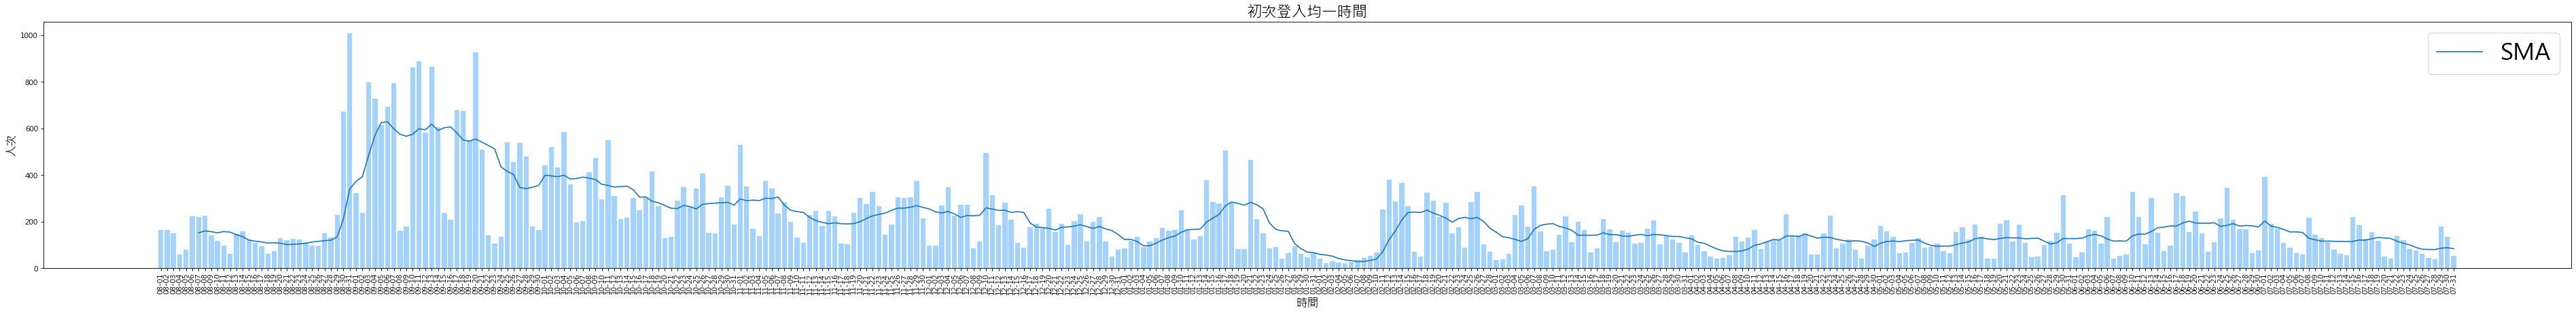

In [25]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
figure(figsize=(60, 6), dpi=80)
plt.bar(timeline["date"],timeline["cnt"],color="#A2D2FF")
timeline["SMA"].plot(label="SMA")
plt.xticks(rotation=90)
plt.title("初次登入均一時間",fontsize=20)
plt.xlabel("時間",fontsize=15)
plt.ylabel("人次",fontsize=15)
plt.legend(prop={'size': 30})
plt.show()

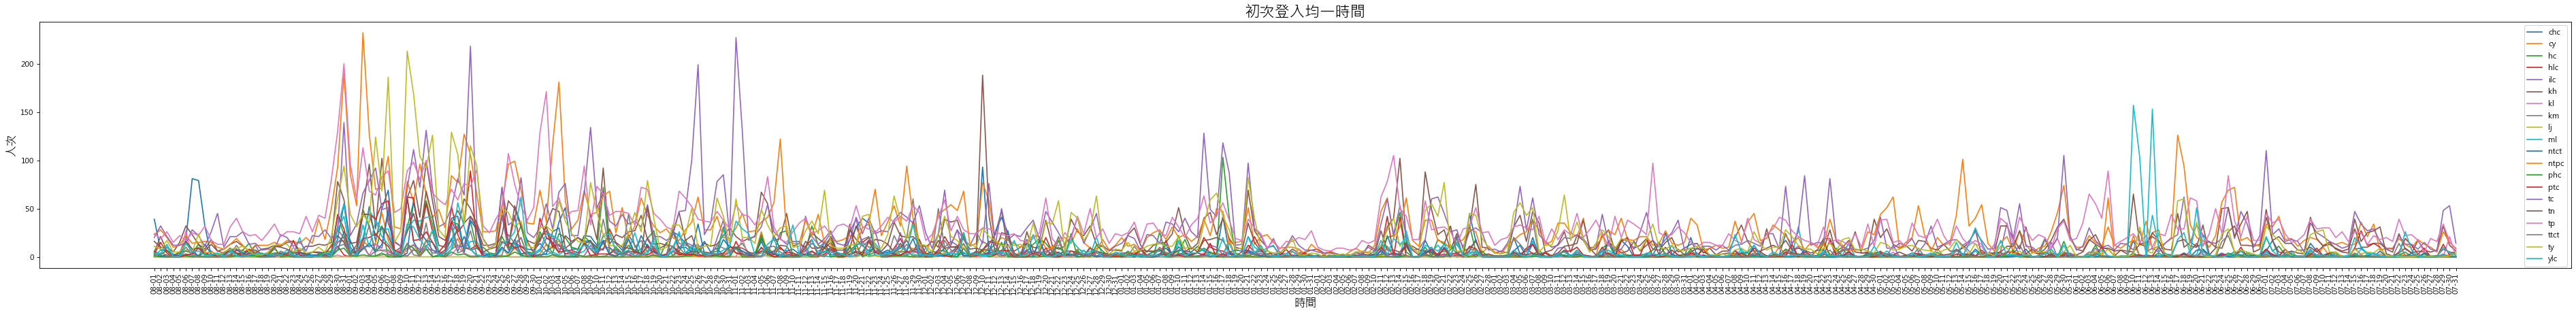

In [26]:
figure(figsize=(60, 6), dpi=80)
city_date=Info_UserData.pivot_table(index=["first_login_date_TW"],columns='user_city', aggfunc={'user_city':'size'}, fill_value=0).reset_index()
city_date.columns=['first_login_date_TW','chc','cy','hc','hlc','ilc','kh','kl','km','lj','ml','ntct','ntpc','phc','ptc','tc','tn','tp','ttct','ty','ylc']
city_date["date"]=city_date["first_login_date_TW"].str.extract(r"((?<=-).+(?=))")
for x in range(1,len(city_date.columns)-1):
    plt.plot(city_date["date"],city_date[city_date.columns[x]],label=city_date.columns[x])
plt.xticks(rotation=90)
plt.title("初次登入均一時間",fontsize=20)
plt.xlabel("時間",fontsize=15)
plt.ylabel("人次",fontsize=15)
plt.legend()
plt.show()

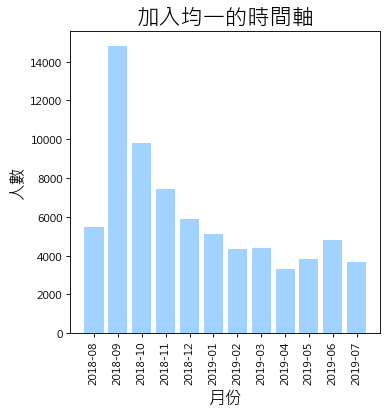

In [27]:
timeline["month"]=timeline["first_login_date_TW"].str.extract(r"((?<=).+(?=-))")
figure(figsize=(5, 5), dpi=80)
plt.bar(timeline.groupby("month").cnt.sum().index,timeline.groupby("month").cnt.sum(),color="#A2D2FF")
plt.title("加入均一的時間軸",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("月份",fontsize=15)
plt.ylabel("人數",fontsize=15)
plt.show()

# 登入時間差

In [28]:
last_login=Log_Problem.groupby("uuid").timestamp_TW.max().reset_index()
remain_junyi=last_login.merge(Info_UserData[["uuid","first_login_date_TW"]], how='inner', on='uuid')

In [29]:
remain_junyi["remain_time"]=pd.to_datetime(remain_junyi["timestamp_TW"],utc=True)-pd.to_datetime(remain_junyi["first_login_date_TW"],utc=True)

<AxesSubplot:>

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


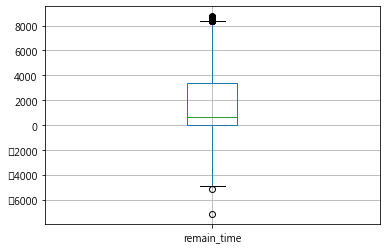

In [30]:
remain_junyi["remain_time"]=remain_junyi["remain_time"].apply(lambda x: x.value/(60*60*(10**9))) #hr
remain_junyi.boxplot(column=["remain_time"])

In [31]:
len(remain_junyi[remain_junyi["remain_time"]<0])/72758

0.0037521647104098517

In [32]:
Info_UserData[Info_UserData.uuid=="+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo="]

,uuid,gender,points,badges_cnt,first_login_date_TW,user_grade,user_city,has_teacher_cnt,is_self_coach,has_student_cnt,belongs_to_class_cnt,has_class_cnt
30323,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,NaN,3720,0,2019-05-30,5,ntct,1,False,0,1,0


In [33]:
Log_Problem[Log_Problem.uuid=="+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo="]

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
1053260,2019-03-14 16:30:00 UTC,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,tBZ3hZqed0H7wHFp8jHQT6bij5GrwxB8L32UylQKUrc=,jGSlrA9XnG+/GbGx4/PTVGqAdx9zVAruerUwpXvOn3E=,1,1,False,14,2,0,False,NaN,NaN,0
1297132,2019-03-14 16:30:00 UTC,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,tF8tMFezQhn36I3yHWsSa2i67yZXerPE5QWgZGCFvFs=,llCFqlTME08B8vSIfQot4+l+LDgEriBoufIyuKM8Two=,6,1,False,81,4,1,True,NaN,NaN,0
1336355,2019-03-14 16:30:00 UTC,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,tBZ3hZqed0H7wHFp8jHQT6bij5GrwxB8L32UylQKUrc=,+rtV71WlWffVMGi6veTRHknqrH0ZTK3dZ5aiRaVDEOs=,7,1,False,19,4,1,True,NaN,NaN,0
2699571,2019-03-21 16:15:00 UTC,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,tF8tMFezQhn36I3yHWsSa2i67yZXerPE5QWgZGCFvFs=,R9VBD7rzzaSnw3d0/Pi2IOE08dxaVs1afNMrguHpkXg=,10,1,True,33,1,0,False,NaN,NaN,0
2716934,2019-03-14 16:30:00 UTC,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,tF8tMFezQhn36I3yHWsSa2i67yZXerPE5QWgZGCFvFs=,xOh2tnfr2lGQziQzk5P2SYtPzIP8fnNzyexwtRCykwg=,7,1,False,54,2,0,False,NaN,NaN,0
2817446,2019-03-14 16:30:00 UTC,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,tBZ3hZqed0H7wHFp8jHQT6bij5GrwxB8L32UylQKUrc=,7YRi6cTAdULZgcFaSGpxYYdBl8f7BwB5pOFOBM/xQD0=,2,1,False,14,2,0,False,NaN,NaN,0
3551411,2019-03-14 16:30:00 UTC,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,tBZ3hZqed0H7wHFp8jHQT6bij5GrwxB8L32UylQKUrc=,CJNBN/Ht2mjgTiNkHzj35dqqGQP1R/AaOVpQLUe47sM=,13,1,False,13,3,0,False,NaN,NaN,0
4300564,2019-03-21 16:15:00 UTC,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,tF8tMFezQhn36I3yHWsSa2i67yZXerPE5QWgZGCFvFs=,mH3Lrqsy2l2/vrY7mG0+aSwwjMf3grNxl3/LUniw9K4=,9,1,True,20,1,0,False,NaN,NaN,0
4586593,2019-03-14 16:30:00 UTC,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,tBZ3hZqed0H7wHFp8jHQT6bij5GrwxB8L32UylQKUrc=,0aQF/W/RRUdvszWol5zD9xtplvTHvpj4Mw+bYAOu4jY=,10,1,True,9,1,0,False,NaN,NaN,0
5998313,2019-03-14 16:30:00 UTC,+6hrwSTsNCCaXYN+qN9A1eku5HZuBiySj6m3kmxcPXo=,tBZ3hZqed0H7wHFp8jHQT6bij5GrwxB8L32UylQKUrc=,7xz/FhkKcps6BnUmyCvnrgXWoKxpAE5FYENvtRjjAHg=,8,1,False,30,3,0,False,NaN,NaN,0


# Conclusion

-	從「**註冊**」角度來看，總共有72758個使用者註冊均一平台，整體資料性完整，唯「性別」有遺失值或unspecified，男女比例差不多，大部分為5~6年級的學生，以六都縣市（台北、新北、台中、桃園、高雄、台南）的使用人次較高，其中最多人註冊為台北市七年級學生。


- 從「**能量/徽章**」角度來看，均一平台透過設計蒐集任務徽章、累積能量點數，來激發學生學習動機，因此可說明能量/徽章越高，代表使用者越常使用均一平台學習。以資料來看，能量與徽章成高度正關係，且存在少數眾多使用者（能量&徽章超高），若從各縣市來比較，可以有趣地發現，相較其他縣市，反而是「金門縣」的使用者平均徽章/能量數最高，若從年級來比較，普遍來看沒有明顯差異，二年級略為高一些。


- 從「**使用者進入均一的第一次時間**」來看，上學期人數比下學期人數多，學期初比學期末高，尤其是九月初的人次增長程度高，且呈現以週為單位的週期性，可見登入均一跟上學期間有極大相關。若以縣市來看，可以發現南投縣在8/6-8/10、台中市在10/24-11/04、台南在12/09-12/12有高峰。另外，若比較「每位使用者最後一次作答」與「第一次進入均一」之時間差，居然有負值（表示進入時間比最後時間很晚），推測可能在Info_UserData的first_login_date_TW可能有出入或是非我們想像的定義。


# Data2：Log_Problem（作答紀錄）

In [34]:
Log_Problem=Log_Problem.merge(Info_UserData[["uuid","gender","user_grade","user_city","points","badges_cnt"]], how='inner', on='uuid')

In [35]:
Log_Problem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16217311 entries, 0 to 16217310
Data columns (total 19 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   timestamp_TW                     object
 1   uuid                             object
 2   ucid                             object
 3   upid                             object
 4   problem_number                   int64 
 5   exercise_problem_repeat_session  int64 
 6   is_correct                       bool  
 7   total_sec_taken                  int64 
 8   total_attempt_cnt                int64 
 9   used_hint_cnt                    int64 
 10  is_hint_used                     bool  
 11  is_downgrade                     object
 12  is_upgrade                       object
 13  level                            int64 
 14  gender                           object
 15  user_grade                       int64 
 16  user_city                        object
 17  points                   

In [36]:
Log_Problem.columns

Index(['timestamp_TW', 'uuid', 'ucid', 'upid', 'problem_number',
       'exercise_problem_repeat_session', 'is_correct', 'total_sec_taken',
       'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_downgrade',
       'is_upgrade', 'level', 'gender', 'user_grade', 'user_city', 'points',
       'badges_cnt'],
      dtype='object')

In [37]:
Log_Problem[['total_sec_taken','total_attempt_cnt', 'used_hint_cnt']].describe()

,total_sec_taken,total_attempt_cnt,used_hint_cnt
count,16217311.00,16217311.00,16217311.00
mean,44.38,1.87,0.53
std,100.54,3.55,1.16
min,0.00,0.00,0.00
25%,10.00,1.00,0.00
50%,21.00,1.00,0.00
75%,45.00,1.00,0.00
max,1800.00,1000.00,65.00


In [38]:
print("總人數 : ",len(Log_Problem.uuid.unique()))

總人數 :  72758


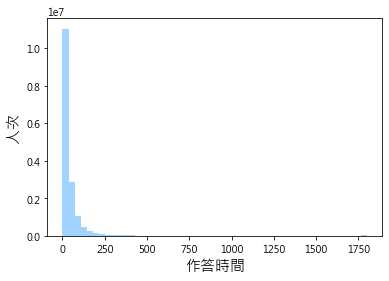

In [39]:
plt.hist(Log_Problem.total_sec_taken,bins=50,color="#A2D2FF")
plt.xlabel("作答時間",fontsize=15)
plt.ylabel("人次",fontsize=15)
plt.show()

In [40]:
Log_Problem[["total_sec_taken"]].sort_values("total_sec_taken",ascending=False).head()

,total_sec_taken
6576266,1800
15976960,1800
14230909,1800
12006016,1800
7013287,1800


In [41]:
print("作答超過30mins；",len(Log_Problem.total_sec_taken[Log_Problem.total_sec_taken==1800]))
print(Log_Problem.total_sec_taken.quantile(0.995))

作答超過30mins； 21735
569.0


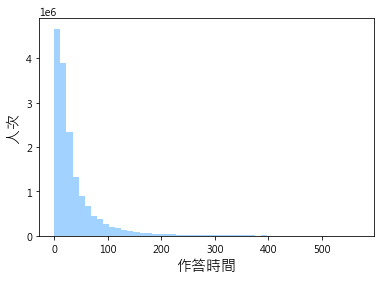

In [42]:
plt.hist(Log_Problem.total_sec_taken[Log_Problem.total_sec_taken<=Log_Problem.total_sec_taken.quantile(0.995)],bins=50,color="#A2D2FF")
plt.xlabel("作答時間",fontsize=15)
plt.ylabel("人次",fontsize=15)
plt.show()

In [43]:
print("刪掉資料數量：",len(Log_Problem.total_sec_taken)-len(Log_Problem.total_sec_taken[Log_Problem.total_sec_taken<=Log_Problem.total_sec_taken.quantile(0.995)]))

刪掉資料數量： 80933


In [44]:
Log_Problem=Log_Problem[Log_Problem.total_sec_taken<=Log_Problem.total_sec_taken.quantile(0.995)]

In [45]:
print("總人數 : ",len(Log_Problem.uuid.unique()))

總人數 :  72743


In [46]:
Log_Problem.total_attempt_cnt.value_counts()

1      12116053
2       1511459
3        835567
4        450182
5        283084
         ...   
691           1
484           1
415           1
708           1
429           1
Name: total_attempt_cnt, Length: 398, dtype: int64

In [47]:
Log_Problem.used_hint_cnt.value_counts()

0     12463053
1      1158220
2      1061505
3       842700
4       392505
5       158762
6        44003
7         7201
10        3007
8         2381
12        1190
9          769
11         742
13         266
14          10
16           8
15           7
20           4
22           4
18           4
17           3
19           3
23           3
21           3
27           2
46           2
29           1
25           1
40           1
38           1
28           1
32           1
42           1
34           1
48           1
47           1
36           1
65           1
55           1
52           1
62           1
41           1
35           1
56           1
51           1
44           1
24           1
Name: used_hint_cnt, dtype: int64

# 每個使用者做題歷程

In [317]:
each_user_summary=Log_Problem.groupby("uuid").agg({"total_sec_taken":np.mean,"is_correct":np.mean,"total_attempt_cnt":np.mean,"used_hint_cnt":np.mean,"ucid":pd.Series.nunique,"upid":"count"}).reset_index()

In [318]:
each_user_summary=each_user_summary.sort_values("ucid",ascending=False)
each_user_summary=each_user_summary.merge(Info_UserData[["uuid","gender","user_grade","user_city","points","badges_cnt"]], how='inner', on='uuid')
each_user_summary

,uuid,total_sec_taken,is_correct,total_attempt_cnt,used_hint_cnt,ucid,upid,gender,user_grade,user_city,points,badges_cnt
0,RDG5hfSbUMf2mV22bLi+o/W8aC1nXnuOrJpavtnD6D4=,35.71,0.87,1.63,0.28,785,11789,unspecified,5,tn,1945741,152
1,GhDsKI5ZwEdFw3QovwEoxV9qSdULzqBMJSCid3hdWCc=,22.50,0.90,1.47,0.19,706,7967,male,5,tp,1554242,53
2,anD2RqFosjmBY0VvYQXa9idhW4acUN0+IsH+lub8hrI=,19.20,0.84,2.13,0.32,664,5364,male,6,ylc,2476118,259
3,TFxee0FtgjWob+Dd1o+gSbXg9htOWJqMbX76dkKMyy0=,20.00,0.88,1.64,0.24,616,6342,NaN,6,ntpc,1500897,35
4,mzIuPqJIQy94DmoZ9PzjcycXFKCvhSwjUQ4AEKnrRII=,29.84,0.86,1.28,0.13,610,8497,NaN,7,cy,1979716,101
...,...,...,...,...,...,...,...,...,...,...,...,...
72738,ahvVJeGpOQx0QL+cHnhw7TrHL18FAB0E70GMpFThxOU=,97.50,0.50,2.50,1.00,1,4,NaN,6,kh,99915,20
72739,FumccUxUYk+QdDp5Jxhh6sXm+4/XgYqoOQa+BgsSxMA=,15.50,0.50,4.00,2.00,1,2,NaN,7,chc,15375,4
72740,jiIKvFxj0F7T2AxPZxUxaYuDH98LMpvMxInnMUqLFVg=,55.25,1.00,1.00,0.00,1,4,NaN,5,hc,2250,0
72741,tkbh6lITuklCtfi0SuU6YUwuiZnVpXSbchqBv8gfOus=,15.33,0.83,1.33,0.17,1,6,NaN,7,tc,1725,0


In [319]:
each_user_summary.columns

Index(['uuid', 'total_sec_taken', 'is_correct', 'total_attempt_cnt',
       'used_hint_cnt', 'ucid', 'upid', 'gender', 'user_grade', 'user_city',
       'points', 'badges_cnt'],
      dtype='object')

In [320]:
each_user_summary[['total_sec_taken', 'is_correct', 'total_attempt_cnt','used_hint_cnt', 'ucid', 'upid']].describe()

,total_sec_taken,is_correct,total_attempt_cnt,used_hint_cnt,ucid,upid
count,72743.00,72743.00,72743.00,72743.00,72743.00,72743.00
mean,41.31,0.71,1.59,0.45,23.77,221.83
std,27.84,0.21,0.74,0.50,41.19,464.69
min,0.00,0.00,0.00,0.00,1.00,1.00
25%,23.90,0.61,1.18,0.12,3.00,17.00
50%,35.53,0.75,1.40,0.32,8.00,59.00
75%,51.25,0.86,1.76,0.63,26.00,215.00
max,533.00,1.00,42.00,11.00,785.00,11789.00


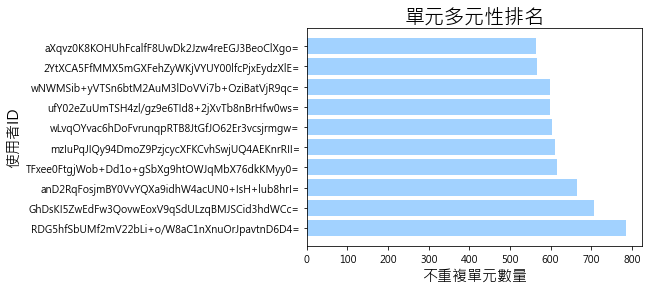

In [321]:
plt.barh(each_user_summary.uuid[0:10],each_user_summary.ucid[0:10],color="#A2D2FF")
plt.title("單元多元性排名",fontsize=20)
plt.xlabel("不重複單元數量",fontsize=15)
plt.ylabel("使用者ID",fontsize=15)
plt.show()

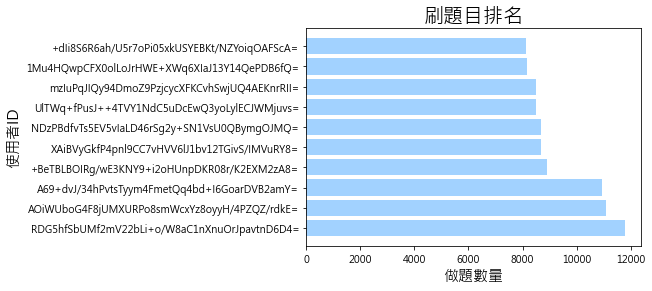

In [322]:
plt.barh(each_user_summary.sort_values("upid",ascending=False).uuid[0:10],each_user_summary.sort_values("upid",ascending=False).upid[0:10],color="#A2D2FF")
plt.title("刷題目排名",fontsize=20)
plt.xlabel("做題數量",fontsize=15)
plt.ylabel("使用者ID",fontsize=15)
plt.show()

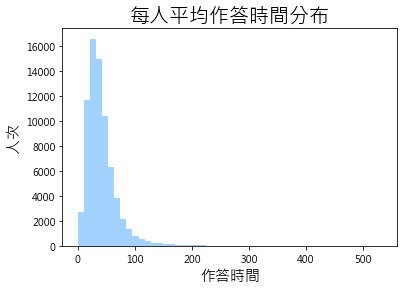

In [324]:
plt.hist(each_user_summary.total_sec_taken,bins=50,color="#A2D2FF")
plt.title("每人平均作答時間分布",fontsize=20)
plt.xlabel("作答時間",fontsize=15)
plt.ylabel("人次",fontsize=15)
plt.show()

<AxesSubplot:>

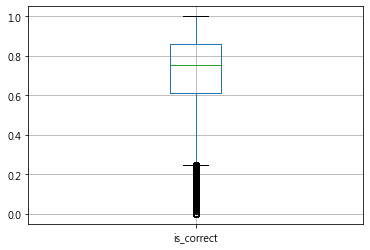

In [325]:
each_user_summary.boxplot(column=["is_correct"])

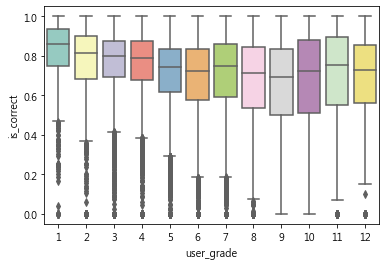

In [326]:
sns.boxplot(x="user_grade", y="is_correct",data=each_user_summary, palette="Set3")
plt.show()

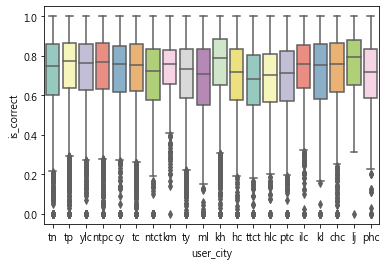

In [327]:
sns.boxplot(x="user_city", y="is_correct",data=each_user_summary, palette="Set3")
plt.show()

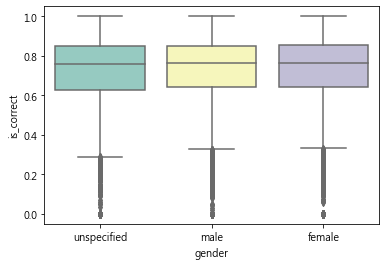

In [328]:
sns.boxplot(x="gender", y="is_correct",data=each_user_summary, palette="Set3")
plt.show()

# 每個單元做題歷程

In [329]:
each_content_summary=Log_Problem.groupby("ucid").agg({"total_sec_taken":np.mean,"is_correct":np.mean,"total_attempt_cnt":np.mean,"used_hint_cnt":np.mean,"uuid":"count"}).reset_index()

In [330]:
each_content_summary.describe()

,total_sec_taken,is_correct,total_attempt_cnt,used_hint_cnt,uuid
count,1326.00,1326.00,1326.00,1326.00,1326.00
mean,43.74,0.65,2.00,0.62,12169.21
std,20.00,0.14,0.49,0.46,11703.35
min,5.45,0.21,1.05,0.02,196.00
25%,29.21,0.55,1.64,0.30,4697.25
50%,40.06,0.66,1.94,0.51,9976.50
75%,54.81,0.76,2.29,0.82,16114.00
max,131.22,0.96,4.58,4.34,138063.00


In [331]:
Info_Content[["ucid","content_pretty_name","difficulty"]]

,ucid,content_pretty_name,difficulty
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,easy
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,easy
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,easy
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,easy
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,easy
...,...,...,...
1325,NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=,【進階】平方公分綜合習題,hard
1326,3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=,【進階】周長與面積綜合習題,hard
1327,j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=,【一般】平方公分綜合習題,normal
1328,W4l0TIo0YQXLT/c8/Uy7OLtElmNuNWPODI7HkJ0NaI0=,【一般】周長與面積綜合習題,normal


In [332]:
each_content_summary=Info_Content[["ucid","content_pretty_name","difficulty"]].merge(each_content_summary.sort_values("uuid",ascending=False), how='inner', on='ucid')

In [333]:
each_content_summary

,ucid,content_pretty_name,difficulty,total_sec_taken,is_correct,total_attempt_cnt,used_hint_cnt,uuid
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,easy,35.49,0.71,1.76,0.70,4163
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,easy,45.74,0.63,2.60,1.05,9272
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,easy,56.68,0.60,2.29,1.29,11674
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,easy,39.46,0.71,2.00,0.70,9736
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,easy,51.53,0.47,2.76,1.24,7222
...,...,...,...,...,...,...,...,...
1321,NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=,【進階】平方公分綜合習題,hard,28.73,0.82,1.51,0.12,12302
1322,3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=,【進階】周長與面積綜合習題,hard,89.15,0.37,3.31,1.21,15292
1323,j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=,【一般】平方公分綜合習題,normal,31.00,0.76,1.66,0.24,15978
1324,W4l0TIo0YQXLT/c8/Uy7OLtElmNuNWPODI7HkJ0NaI0=,【一般】周長與面積綜合習題,normal,62.79,0.45,3.16,1.10,16533


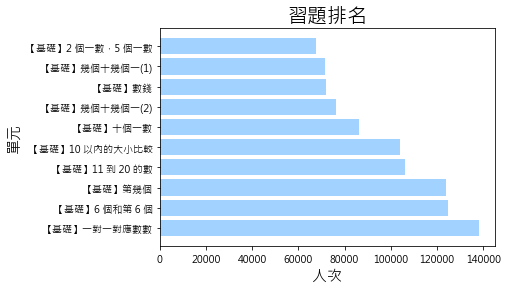

In [334]:
plt.barh(each_content_summary.sort_values("uuid",ascending=False).content_pretty_name[0:10],each_content_summary.sort_values("uuid",ascending=False).uuid[0:10],color="#A2D2FF")
plt.title("習題排名",fontsize=20)
plt.xlabel("人次",fontsize=15)
plt.ylabel("單元",fontsize=15)
plt.show()

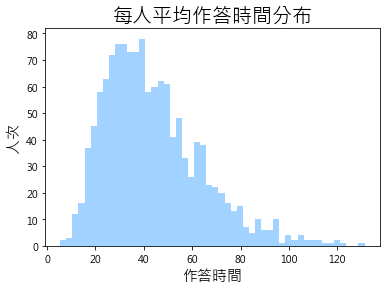

In [335]:
plt.hist(each_content_summary.total_sec_taken,bins=50,color="#A2D2FF")
plt.title("每人平均作答時間分布",fontsize=20)
plt.xlabel("作答時間",fontsize=15)
plt.ylabel("人次",fontsize=15)
plt.show()

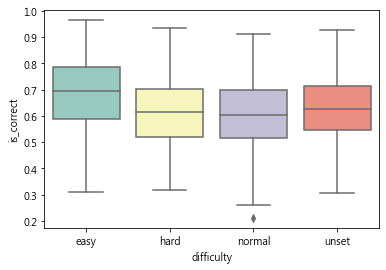

In [336]:
sns.boxplot(x="difficulty", y="is_correct",data=each_content_summary.sort_values("difficulty"), palette="Set3")
plt.show()

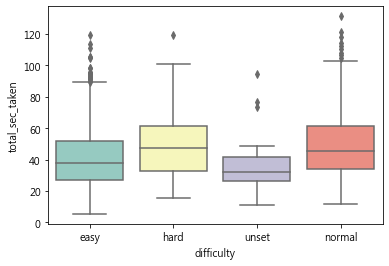

In [337]:
sns.boxplot(x="difficulty", y="total_sec_taken",data=each_content_summary, palette="Set3")
plt.show()

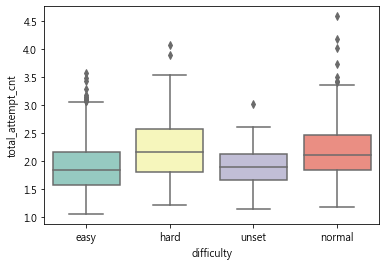

In [338]:
sns.boxplot(x="difficulty", y="total_attempt_cnt",data=each_content_summary, palette="Set3")
plt.show()

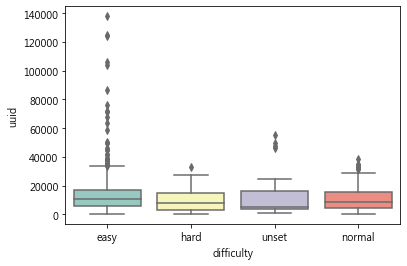

In [339]:
sns.boxplot(x="difficulty", y="uuid",data=each_content_summary, palette="Set3")
plt.show()

# 處理level / user_grade/exercise_problem_repeat_session/連續答對次數

In [48]:
Log_Problem

,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,gender,user_grade,user_city,points,badges_cnt
0,2019-05-26 21:00:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,KDOmuTrY/IJzDP4kIgIYCBiGyTymsJ8Iy4cDB35WGYg=,Vbs92l4JmdiWkUEm/iahxnUTaac2oN1IlUtXB7JcfoE=,18,2,True,33,1,0,False,False,True,3,female,7,tp,131366,16
1,2019-05-06 20:30:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,2rJ6DLjEMKZiRtzTx7yjg+2lbHOfTfLDyNli2mFXTiA=,DlnX9mEUtmu8i56DAfwfoFGY87J8+MyQO2TZzxPYwxw=,3,1,True,31,1,0,False,NaN,NaN,0,female,7,tp,131366,16
2,2019-06-01 20:45:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,K1JDDj+chCE/ZH5wzdraQHI2j52Nzy0JBJmeLOgq3vc=,axF9BHrPqRAWLRi1190T0zxKUKB8oyoXujFhFiKWUmE=,16,1,True,7,1,0,False,NaN,NaN,3,female,7,tp,131366,16
3,2019-06-15 20:15:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,WIVV2NtKYatcEnMpVQbIYkGSMd8Q9Xt74y5a+V5bXs0=,yjaPD3QSqIl7ZCg3iPipsr9kK8Bt/cKkDOVI5tyZMW0=,11,1,True,41,1,0,False,NaN,NaN,3,female,7,tp,131366,16
4,2019-06-16 12:30:00 UTC,FLy+lviglNR5Y1l0Xiijnl6QHySBcpKHJLCtQ6ogm2Q=,Cfvrgm1Xt18sIEZ4kpSnePUQfJFC6uDZ281lZ6A7m+U=,kk8BQCpwxHT4caLIqSQj4WzUz8hE8Udaa02fV3sbKW8=,12,1,True,62,1,0,False,NaN,NaN,1,female,7,tp,131366,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217306,2019-04-14 16:30:00 UTC,E8fJFFZyjQs5v269vJoeD0UnrbftUu8qhkjtQg1c0Zs=,TXBvUiNlr5jhR8zA+8xXAAvhjwKoxhJgVCFi6g3MkXE=,Abmm5Ye3eZw/VtKQEfUvwVxt7B7GEmrP9iiMZrXvWk0=,1,1,False,0,0,1,True,NaN,NaN,0,NaN,8,ty,1357,0
16217307,2019-04-16 14:30:00 UTC,vw1aQ3xFH1p/8dileKreYvubN7nVrJQ4vsTquWAxvGM=,H9tE/axZ4DsmCfhZY9auIyxyBeXalwM2dnTvNSkhD+E=,OvRJFBLBV0NMDjJOvRLW1uMij0idXOhqlHS5KhKup7A=,2,1,True,60,1,0,False,NaN,NaN,0,NaN,9,ty,1875,0
16217308,2019-05-06 21:30:00 UTC,g7XeGqv+sEyomgSQqK1MiD5qY7syNrgPpX5OYZBrC8g=,aaqqTl3AwAAh2Zu0fBTrKYA+Jgnh5Xcn3VznWez5WJU=,H+5LVP3dHsF1tuoMHH0uYM6TKMQQciQw5VI2LfwiZ38=,1,1,False,0,0,1,True,NaN,NaN,0,male,11,tp,86,0
16217309,2019-04-08 09:00:00 UTC,4Pu17C+sQfnECIAa3jOPraAYg3BZ6Gtc+hPQx0/BPDw=,UJx6vGY4lwuup0V3VTTKZmE76AogRe5ecQHc+Yly1YM=,sw6x36H5i+khs6GWAkLEYBoRFk5YfSWhL2n2CLKVEU8=,1,1,True,80,1,0,False,NaN,NaN,0,NaN,7,ylc,75,0


In [49]:
level=Log_Problem.pivot_table(index=["ucid"],columns="level", aggfunc={"level":'size'}, fill_value=0).reset_index()
level.columns=['ucid', "level0", "level1", "level2", "level3", "level4"]
level.head()

,ucid,level0,level1,level2,level3,level4
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,6688,441,64,74,4
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,1312,57,15,8,2
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,1167,122,49,30,9
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,11180,1800,492,442,102
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,15080,2785,848,579,198


In [52]:
Log_Problem.columns

Index(['timestamp_TW', 'uuid', 'ucid', 'upid', 'problem_number',
       'exercise_problem_repeat_session', 'is_correct', 'total_sec_taken',
       'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_downgrade',
       'is_upgrade', 'level', 'gender', 'user_grade', 'user_city', 'points',
       'badges_cnt'],
      dtype='object')

In [60]:
unique_cnt=Log_Problem.groupby(["ucid","uuid","user_grade"]).agg({"user_city": "unique"}).reset_index()
unique_cnt

,ucid,uuid,user_grade,user_city
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,+2YbbQfx7cwSnt8NEb+HpGJGal92gNJUt5cciCkp4pA=,9,[ntpc]
1,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,+2abMV9txxcfEweYKMsmCCuGOAULfHyrW1x30xcaJNc=,8,[hlc]
2,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,+FssPgE7mQwfhI1M+kKDCnMoKtEFhUNU+2iE3wqB7co=,8,[ml]
3,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,+GzFcJVo+8f4vKOLiWSU2WtomOvkOF3X54/Y3CXk150=,8,[ptc]
4,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,+Il32qEbzrCWFo8T9OEuQZ+MqYh6B48I6dSyLQRl9Ng=,8,[ntct]
...,...,...,...,...
1729338,zxxjH0rOlRk3Fe7P3H8+00eXPXeazjvuIXf2bdEyhJo=,zeIuckaaHPNZ+FE4eHDO7X+9JK9vULiW42xmfmLhpFQ=,7,[tp]
1729339,zxxjH0rOlRk3Fe7P3H8+00eXPXeazjvuIXf2bdEyhJo=,zlgkXdriVFQoRstJf+s5OgNX98ZBNGdqvwRZ2G3WK3E=,7,[ylc]
1729340,zxxjH0rOlRk3Fe7P3H8+00eXPXeazjvuIXf2bdEyhJo=,zs0tYSukmEax6GbTDKHBtceDBNagSZv+SxwaXT9+VfE=,7,[tp]
1729341,zxxjH0rOlRk3Fe7P3H8+00eXPXeazjvuIXf2bdEyhJo=,zszyefb34Eb/V1jfONRdjFhHceZZdhTXeDSygGOulrk=,7,[ylc]


In [62]:
grade=unique_cnt.pivot_table(index=["ucid"],columns="user_grade", aggfunc={"user_grade":'size'}, fill_value=0).reset_index()
grade.columns=['ucid', 'grade_1', 'grade_2', 'grade_3', 'grade_4', 'grade_5', 'grade_6','grade_7','grade_8','grade_9','grade_10','grade_11','grade_12']
grade.head()

,ucid,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,2,1,3,4,2,14,17,339,117,9,6,2
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,0,1,0,1,4,3,4,2,77,9,4,2
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,0,0,1,2,23,151,38,7,0,0,0,0
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,6,3,5,8,15,85,939,193,129,26,12,10
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,9,11,48,1052,598,195,24,9,7,9,9,10


In [64]:
#重複人次
grade_2=Log_Problem.pivot_table(index=["ucid"],columns="user_grade", aggfunc={"user_grade":'size'}, fill_value=0).reset_index()
grade_2.head()

ucid user_grade            \
user_grade                                                        1    2    3   
0           +DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=          7    6   45   
1           +IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=          0    3    0   
2           +Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=          0    0    5   
3           +N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=         43    8   28   
4           +ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=         81  120  446   

                                                                
user_grade      4     5     6     7     8     9   10   11   12  
0              76    17    70   174  4791  1764  170  132   19  
1               1    23    60    29    40  1079  113   37    9  
2               9   177   902   213    71     0    0    0    0  
3              74    80   751  9083  1856  1576  305  106  106  
4           10619  5653  1996   211    62    67   84   85   66

In [65]:
city=Log_Problem.pivot_table(index=["ucid"],values="is_correct",columns="user_city", aggfunc={"is_correct":np.mean}).reset_index()
city.head()

user_city,ucid,chc,cy,hc,hlc,ilc,kh,kl,km,lj,...,ntct,ntpc,phc,ptc,tc,tn,tp,ttct,ty,ylc
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,0.53,0.27,0.61,0.47,0.28,0.32,0.61,0.73,NaN,...,0.29,0.38,1.00,0.31,0.51,0.40,0.45,0.39,0.43,0.46
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,0.00,0.67,0.60,0.60,0.29,0.47,NaN,0.50,NaN,...,0.67,0.40,0.62,NaN,0.52,0.47,0.50,0.00,0.48,0.30
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,0.78,0.60,0.40,0.68,0.72,0.63,NaN,0.80,NaN,...,0.69,0.74,NaN,0.46,0.62,0.77,0.76,0.59,0.57,0.57
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,0.65,0.69,0.62,0.54,0.47,0.62,0.59,0.78,NaN,...,0.69,0.68,0.52,0.53,0.65,0.71,0.70,0.56,0.71,0.78
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,0.64,0.69,0.63,0.63,0.59,0.68,0.86,0.61,0.76,...,0.55,0.72,0.54,0.61,0.65,0.71,0.72,0.61,0.65,0.70


In [66]:
repeat=Log_Problem.pivot_table(index=["ucid"],columns="exercise_problem_repeat_session", aggfunc={"exercise_problem_repeat_session":'size'}, fill_value=0).reset_index()
repeat.head()

ucid  \
exercise_problem_repeat_session                                                 
0                                +DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=   
1                                +IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=   
2                                +Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=   
3                                +N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=   
4                                +ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=   

                                exercise_problem_repeat_session             \
exercise_problem_repeat_session                               1     2    3   
0                                                          5664  1061  303   
1                                                          1030   273   78   
2                                                          1348    28    1   
3                                                         11995  1359  393   
4                                                         16784  2102  397   

                                                          ...                  \
exercise_problem_repeat_session    4   5   6   7   8   9  ... 110 111 112 113   
0                                126  77  35   5   0   0  ...   0   0   0   0   
1                                 12   1   0   0   0   0  ...   0   0   0   0   
2                                  0   0   0   0   0   0  ...   0   0   0   0   
3                                133  41  24  20  20  17  ...   0   0   0   0   
4                                124  50  21   9   3   0  ...   0   0   0   0   

                                                         
exercise_problem_repeat_session 114 115 116 117 118 119  
0                                 0   0   0   0   0   0  
1                                 0   0   0   0   0   0  
2                                 0   0   0   0   0   0  
3                                 0   0   0   0   0   0  
4                                 0   0   0   0   0   0  

[5 rows x 120 columns]

In [67]:
data=Log_Problem.groupby('ucid').agg({"uuid":"count","upid":pd.Series.nunique,
                                 "is_correct":np.mean,"total_sec_taken":np.mean,"total_attempt_cnt":np.mean,"used_hint_cnt":np.mean,"points":np.mean,"badges_cnt":np.mean}).reset_index()

In [68]:
data=data.merge(level, how='inner', on='ucid')
data

,ucid,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,level0,level1,level2,level3,level4
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,7271,38,0.42,38.03,2.50,1.00,258828.93,68.06,6688,441,64,74,4
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,1394,17,0.46,39.24,2.16,0.33,166992.07,34.36,1312,57,15,8,2
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,1377,18,0.67,48.08,1.83,0.63,365160.09,39.45,1167,122,49,30,9
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,14016,21,0.65,37.42,1.77,0.33,229002.68,40.49,11180,1800,492,442,102
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,19490,18,0.66,31.35,2.12,0.39,275208.63,34.25,15080,2785,848,579,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,zcH7Yl/gFwkU2Mej9UzQgaJL66wIdiMucPZwVyeqHxc=,24728,25,0.65,32.33,1.71,0.37,253692.47,40.70,17664,4140,1666,980,278
1322,zh/Ht6E99DfEW1ZtC/mgD6MmKmVQEiH09UOhX+Dz3rI=,13031,20,0.56,29.40,2.16,0.49,246051.81,48.83,10783,1566,402,210,70
1323,znVNbyVOWXo/XrF4bWN0DAWkAGmYu/jwUwO5BReUQxY=,1057,10,0.70,31.67,1.86,0.31,601186.40,97.31,780,220,39,15,3
1324,zpLoCKHOugDScAlFt0XHJJKFwU+r3YZaBlTf5G7qWpE=,33147,16,0.73,24.98,1.62,0.25,246576.12,29.45,22164,5490,2748,2037,708


In [69]:
data=data.merge(grade, how='inner', on='ucid')
data

,ucid,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,level0,...,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,7271,38,0.42,38.03,2.50,1.00,258828.93,68.06,6688,...,3,4,2,14,17,339,117,9,6,2
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,1394,17,0.46,39.24,2.16,0.33,166992.07,34.36,1312,...,0,1,4,3,4,2,77,9,4,2
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,1377,18,0.67,48.08,1.83,0.63,365160.09,39.45,1167,...,1,2,23,151,38,7,0,0,0,0
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,14016,21,0.65,37.42,1.77,0.33,229002.68,40.49,11180,...,5,8,15,85,939,193,129,26,12,10
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,19490,18,0.66,31.35,2.12,0.39,275208.63,34.25,15080,...,48,1052,598,195,24,9,7,9,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,zcH7Yl/gFwkU2Mej9UzQgaJL66wIdiMucPZwVyeqHxc=,24728,25,0.65,32.33,1.71,0.37,253692.47,40.70,17664,...,10,13,23,275,1044,348,266,36,16,15
1322,zh/Ht6E99DfEW1ZtC/mgD6MmKmVQEiH09UOhX+Dz3rI=,13031,20,0.56,29.40,2.16,0.49,246051.81,48.83,10783,...,3,3,14,40,743,133,81,21,11,8
1323,znVNbyVOWXo/XrF4bWN0DAWkAGmYu/jwUwO5BReUQxY=,1057,10,0.70,31.67,1.86,0.31,601186.40,97.31,780,...,0,0,0,2,13,67,18,4,2,2
1324,zpLoCKHOugDScAlFt0XHJJKFwU+r3YZaBlTf5G7qWpE=,33147,16,0.73,24.98,1.62,0.25,246576.12,29.45,22164,...,146,1674,855,341,81,22,17,17,12,17


# Conclusion

- 在**作答紀錄**上，作答時間、作答嘗試次數、使用提示次數皆有極端值，其中「作答紀錄」有許多的1800秒(30mins)，推測只要超過30mins，就紀錄為1800。


- 從「**個別使用者**」角度來看，單一使用者做答題數最高，不重複單元為785個，重複作答題目有11989次，大部分使用者平均作答時間皆落在100秒以內，答對率平均0.71，從年級來看，低年級使用者（1-4）較高年級（5以後）使用者平均答對率較高一些，推測低年級題目較為簡單，而從縣市、性別來看，較無明顯差異。


- 從「**個別單元**」角度來看，「【基礎】一對一應數數」單元被作答次數最多，將近高達14萬，每個單元被作答的平均時間較為集中，較無特別單元需要花比較久時間作答，至於從難度來看，簡單題較一般題、困難題的答對率高很多，作答時間、提示數則低很多，可見此指標確實有符合其意義，然而，討論作答題目被作答次數，大致上跟難度沒有明顯關係，唯簡單題比較多極端值（表示少數簡單題單元被很多人做）。


- 為了增加對每一單元作答狀況的了解，特別探討使用者的「精熟數」、「年級」、「縣市」之特徵，例如想知道哪一個單元較容易得到精熟（等級4）、該單元較多哪一些年級的使用者作答、每個單元在不同縣市下的答對率會有差嗎？



# Data3：Info_Content（習題資料）

In [70]:
Info_Content

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
0,odIwFdIiecFwVUAEEV40K3MSuCSlIZkbq92Zp9tkZq8=,【基礎】怎樣解題：數量關係,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
1,dfeeBaa8zDhWS6nu7zeXKwLyi4zqEajI3tJM9/fSBPM=,【基礎】和差問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
2,C2AT0OBTUn+PRxEVd39enhW/DJtka1Tk90DUAR6yVdA=,【基礎】雞兔問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
3,jZvYpEa6VB/WrlKKmQHnfbv/xJ4OypBzq0epVcn500Q=,【基礎】年齡問題 1,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
4,M+UxJPgRIW57a0YS3eik8A9YDj+AwaMpTa5yWYn/kAw=,【基礎】追趕問題,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,bo3jsx1beVLEZ+2sckxdZNYnlLpVS7hb5lWU2baQ66k=,KPJMQebU0O24+NzlQ4udb2BXLlKV1Hte61+hV5Xb+oU=
...,...,...,...,...,...,...,...,...,...,...
1325,NPkrCjbLK35wefMCv6y6XMO5eYO/gthS6LGwrdjG2OQ=,【進階】平方公分綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=
1326,3xqxJN2W+KEo3SBjh7HnXpGjB4ewSbm1j/18fCn05yc=,【進階】周長與面積綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=
1327,j4rGpwpqhLE9foelXD2yjokS0u3QR+ULhNqLGeF/4sk=,【一般】平方公分綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,JtYpwXqNWwRqPrXYh0JhE2lEEUI1gKRPdDH3jYwhqMo=
1328,W4l0TIo0YQXLT/c8/Uy7OLtElmNuNWPODI7HkJ0NaI0=,【一般】周長與面積綜合習題,Exercise,normal,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,7f73q332BKPBXaixasa4EkUb+pF6VAsLxNIg4506JJs=,8OFhw5s0EmQIKBlKbJL+Dvp+u3ss4rN3foLwLM4xXls=,Ny1/uHUXA4pvWVN1nVWv+vsdaQde7StyoQV8HAyJD80=


In [71]:
Info_Content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ucid                 1330 non-null   object
 1   content_pretty_name  1330 non-null   object
 2   content_kind         1330 non-null   object
 3   difficulty           1330 non-null   object
 4   subject              1330 non-null   object
 5   learning_stage       1330 non-null   object
 6   level1_id            1330 non-null   object
 7   level2_id            1330 non-null   object
 8   level3_id            1330 non-null   object
 9   level4_id            1330 non-null   object
dtypes: object(10)
memory usage: 104.0+ KB


In [72]:
print(Info_Content["content_kind"].value_counts())
print()
print(Info_Content["subject"].value_counts())

Exercise    1330
Name: content_kind, dtype: int64

math    1330
Name: subject, dtype: int64


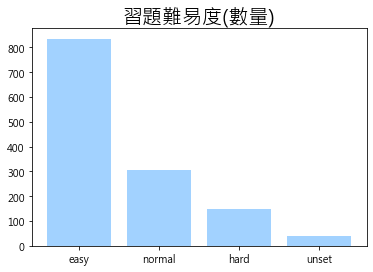

In [73]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.bar(Info_Content["difficulty"].value_counts().index,Info_Content["difficulty"].value_counts(),color="#A2D2FF")
plt.title("習題難易度(數量)",fontsize=20)
plt.show()

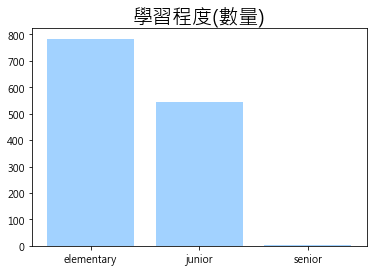

In [74]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.bar(Info_Content["learning_stage"].value_counts().index,Info_Content["learning_stage"].value_counts(),color="#A2D2FF")
plt.title("學習程度(數量)",fontsize=20)
plt.show()

In [97]:
Info_Content.pivot_table(index=["difficulty"],columns="learning_stage", aggfunc={"learning_stage":'size'}, fill_value=0).reset_index()

difficulty learning_stage              
learning_stage                elementary junior senior
0                    easy            500    333      2
1                    hard             96     53      0
2                  normal            173    132      0
3                   unset             15     25      1

In [75]:
partly_Content=Info_Content[Info_Content.ucid.isin(data["ucid"])][["ucid","content_pretty_name","learning_stage","difficulty"]]

In [76]:
data=data.merge(partly_Content, how='inner', on='ucid')
data

,ucid,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,level0,...,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,content_pretty_name,learning_stage,difficulty
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,7271,38,0.42,38.03,2.50,1.00,258828.93,68.06,6688,...,14,17,339,117,9,6,2,【基礎】餘角與補角、對頂角,junior,easy
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,1394,17,0.46,39.24,2.16,0.33,166992.07,34.36,1312,...,3,4,2,77,9,4,2,【一般】幾何證明與三心,junior,normal
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,1377,18,0.67,48.08,1.83,0.63,365160.09,39.45,1167,...,151,38,7,0,0,0,0,【一般】估算綜合習題,elementary,normal
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,14016,21,0.65,37.42,1.77,0.33,229002.68,40.49,11180,...,85,939,193,129,26,12,10,【基礎】分數的約分與擴分,junior,easy
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,19490,18,0.66,31.35,2.12,0.39,275208.63,34.25,15080,...,195,24,9,7,9,9,10,【基礎】平方公尺與平方公分,elementary,easy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,zcH7Yl/gFwkU2Mej9UzQgaJL66wIdiMucPZwVyeqHxc=,24728,25,0.65,32.33,1.71,0.37,253692.47,40.70,17664,...,275,1044,348,266,36,16,15,【基礎】去括號的加減運算,junior,easy
1322,zh/Ht6E99DfEW1ZtC/mgD6MmKmVQEiH09UOhX+Dz3rI=,13031,20,0.56,29.40,2.16,0.49,246051.81,48.83,10783,...,40,743,133,81,21,11,8,【基礎】列出一元一次不等式,junior,easy
1323,znVNbyVOWXo/XrF4bWN0DAWkAGmYu/jwUwO5BReUQxY=,1057,10,0.70,31.67,1.86,0.31,601186.40,97.31,780,...,2,13,67,18,4,2,2,【進階】多項式除法運算,junior,hard
1324,zpLoCKHOugDScAlFt0XHJJKFwU+r3YZaBlTf5G7qWpE=,33147,16,0.73,24.98,1.62,0.25,246576.12,29.45,22164,...,341,81,22,17,17,12,17,【基礎】真分數和假分數,elementary,easy


# 算連續答對率

In [77]:
def func(a, b): 
    n = 1 
    while b*n in a: 
        n += 1 
    return n - 1 

In [78]:
Log_Problem=Log_Problem.sort_values(['uuid',"ucid","problem_number"])

In [79]:
Log_Problem.is_correct=Log_Problem.is_correct.astype(str)

In [87]:
repeat_correct_rate=Log_Problem.groupby(['uuid',"ucid"]).agg({"is_correct":lambda x: "{%s}" % ''.join(x),'upid':"count"}).reset_index()
repeat_correct_rate

,uuid,ucid,is_correct,upid
0,++5bdNp/LZvGenJ8Brp4n2SfS9d4pu4qA7cF7FQW7hk=,VY6aXT7f64ny+uy4pszHVNSy3WHyoFPuhwToxBhB3wM=,{TrueTrueTrueTrueTrue},5
1,++9EkR6syMGk44XpyhOj40cg9xiXwCLS/TwEy+ujrL0=,FR4KFXSJBwuu1LqaZRVJs+gv6d7T8mqibchrQhNvAKc=,{TrueFalseFalseFalseFalseFalseFalseFalseFalseF...,29
2,++E4TrlDYvGtPBg1edhkLXLEEbnfiAgAamPQ33vpW8M=,Qx6mwirYKln7CTvOXad5Do5OkVKmypYSQfFs0MB6Cvs=,{TrueTrueFalseFalseTrueTrueTrueFalseTrueTrue},10
3,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,412PAnenNdYglQWXSlVtS1RYA7Yg60Wty166LCMaiHU=,{TrueTrueTrueTrueTrueTrueTrueTrue},8
4,++G4mkLfs4WDYhc1Ga+3G+/oqSniQQvLBm7SBQ3V39Y=,HKqPgUALqZGw984KFqAMeDwDJTi9cNhJ51UXfjzELSg=,{FalseTrueFalseTrueTrueFalseTrueTrueTrue},9
...,...,...,...,...
1729338,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,m6DnlS38gmb+QFf7102iqmQim9m7dKlTfZ7bPLN+Ato=,{TrueTrueTrue},3
1729339,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,oAoQyh9NT0lXlshN6sYYNSMTizpgCVqITEKcEthrDZU=,{TrueFalseTrueTrueFalseTrueTrueTrueTrueTrueTru...,15
1729340,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,pHm5o9NLjlO2lXB7CH2U80qF20rcHwHgxaIwnQiSd/c=,{TrueFalse},2
1729341,zzyukk9LNl7j/9xxgZj6roQBbGn1MjSPTCgc0r5sXpU=,sbRL5aKtZBIUbbb8mbJqn1Zi8nvOprK9WY8NWGHonA0=,{TrueTrueTrueTrueTrue},5


In [88]:
repeat_correct_rate["repeat_correct_cnt"]=repeat_correct_rate["is_correct"].apply(lambda x : func(x, "True"))

In [89]:
repeat_correct_rate["repeat_correct_pct"]=repeat_correct_rate["repeat_correct_cnt"]/repeat_correct_rate["upid"]

In [253]:
Log_Problem.is_correct=Log_Problem.is_correct.astype(bool)

In [96]:
data=data.merge(repeat_correct_rate.groupby("ucid").agg({"repeat_correct_pct":np.mean}).reset_index(), how='inner', on='ucid')
data

,ucid,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,level0,...,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,content_pretty_name,learning_stage,difficulty,repeat_correct_pct
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,7271,38,0.42,38.03,2.50,1.00,258828.93,68.06,6688,...,17,339,117,9,6,2,【基礎】餘角與補角、對頂角,junior,easy,0.38
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,1394,17,0.46,39.24,2.16,0.33,166992.07,34.36,1312,...,4,2,77,9,4,2,【一般】幾何證明與三心,junior,normal,0.28
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,1377,18,0.67,48.08,1.83,0.63,365160.09,39.45,1167,...,38,7,0,0,0,0,【一般】估算綜合習題,elementary,normal,0.59
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,14016,21,0.65,37.42,1.77,0.33,229002.68,40.49,11180,...,939,193,129,26,12,10,【基礎】分數的約分與擴分,junior,easy,0.54
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,19490,18,0.66,31.35,2.12,0.39,275208.63,34.25,15080,...,24,9,7,9,9,10,【基礎】平方公尺與平方公分,elementary,easy,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,zcH7Yl/gFwkU2Mej9UzQgaJL66wIdiMucPZwVyeqHxc=,24728,25,0.65,32.33,1.71,0.37,253692.47,40.70,17664,...,1044,348,266,36,16,15,【基礎】去括號的加減運算,junior,easy,0.53
1322,zh/Ht6E99DfEW1ZtC/mgD6MmKmVQEiH09UOhX+Dz3rI=,13031,20,0.56,29.40,2.16,0.49,246051.81,48.83,10783,...,743,133,81,21,11,8,【基礎】列出一元一次不等式,junior,easy,0.47
1323,znVNbyVOWXo/XrF4bWN0DAWkAGmYu/jwUwO5BReUQxY=,1057,10,0.70,31.67,1.86,0.31,601186.40,97.31,780,...,13,67,18,4,2,2,【進階】多項式除法運算,junior,hard,0.59
1324,zpLoCKHOugDScAlFt0XHJJKFwU+r3YZaBlTf5G7qWpE=,33147,16,0.73,24.98,1.62,0.25,246576.12,29.45,22164,...,81,22,17,17,12,17,【基礎】真分數和假分數,elementary,easy,0.56


In [115]:
grade_cnt=data[["grade_1","grade_2","grade_3","grade_4","grade_5","grade_6","grade_7","grade_8","grade_9","grade_10","grade_11","grade_12"]]
Tops =pd.DataFrame(grade_cnt.apply(lambda x:list(grade_cnt.columns[np.array(x).argsort()[::-1][:3]]), axis=1).to_list(),  columns=['Top1', 'Top2', 'Top3'])
Tops["Top1"]

0       grade_8
1       grade_9
2       grade_6
3       grade_7
4       grade_4
         ...   
1321    grade_7
1322    grade_7
1323    grade_8
1324    grade_4
1325    grade_7
Name: Top1, Length: 1326, dtype: object

In [166]:
data["grade_top"]=Tops["Top1"]
data["grade_top"]=data["grade_top"].str.extract(r"((?<=_).+(?=))")
data["grade_top"]=data["grade_top"].astype(int)

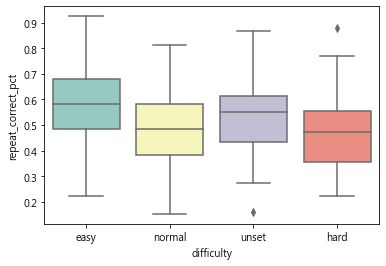

In [99]:
sns.boxplot(x="difficulty", y="repeat_correct_pct",data=data, palette="Set3")
plt.show()

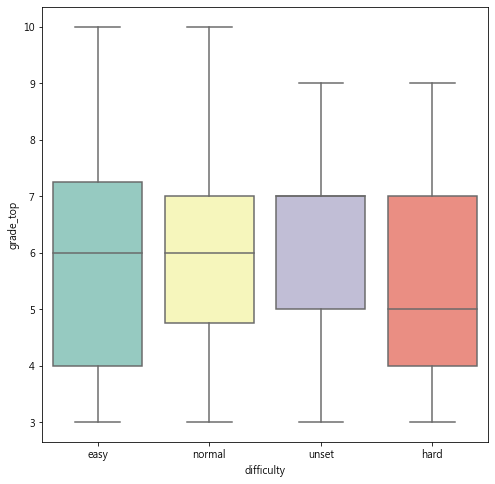

In [167]:
sns.boxplot(x="difficulty", y="grade_top",data=data, palette="Set3")
plt.show()

In [121]:
import re 
print(data["content_pretty_name"].str.extract(r"((?<=【).+(?=】))").value_counts())
print(data["difficulty"].value_counts())

基礎    829
一般    305
進階    148
例題      2
dtype: int64
easy      832
normal    304
hard      149
unset      41
Name: difficulty, dtype: int64


In [120]:
data[~data["content_pretty_name"].str.contains(r"^【.*")]

,ucid,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,level0,...,grade_8,grade_9,grade_10,grade_11,grade_12,content_pretty_name,learning_stage,difficulty,repeat_correct_pct,grade_top
7,+cLbiKkV7+VhNPr7OGG3B3kPpZ8er0mvFvqPbM/gm+E=,16693,31,0.31,16.67,3.01,1.11,385726.24,47.44,13659,...,60,42,29,51,30,點與線、線與線距離,senior,unset,0.16,grade_5
20,/0Y1OFJkQGPagfYO9uI6mM0Z9KK7vcmT/QPVos+v7Ec=,4919,24,0.54,20.02,2.16,0.24,385928.86,71.34,4084,...,34,25,10,3,3,反比,junior,unset,0.42,grade_7
45,0TFQA8MIRYvgH+PXVXYkRKMPK/LPcaVH9hTxb5daZ+o=,6171,31,0.54,30.72,2.11,0.30,330359.51,56.06,5091,...,59,28,9,7,9,比的應用,junior,unset,0.37,grade_7
77,2Q4i17ObOkd2Yb449DHA1IBEBnZ/7EImF3FYztgI+dk=,781,18,0.54,25.49,1.79,0.80,306481.89,54.02,562,...,5,46,5,0,0,兩圓的位置關係應用,junior,unset,0.42,grade_9
91,3C+qN0SBDoX18ZlkWCo9GhwnYOVQZ4S3XcPPwRLkOWU=,3426,22,0.63,22.45,1.80,0.20,461211.42,81.91,2640,...,28,25,10,4,2,判斷二元一次方程式及幾組解,junior,unset,0.47,grade_7
101,3VfCWZFKH42xkwq4yzD7e3080d6sXtw7H8OM4GXFB/4=,3870,37,0.52,34.72,2.18,0.25,341194.45,65.33,3303,...,31,20,10,2,2,加減消去法解聯立方程式,junior,unset,0.47,grade_7
143,5BND+QhJLGTw2gPNqCs0SjqEQuGL+IN798lUL3RUG3s=,5244,54,0.58,40.14,2.05,0.27,345124.90,61.13,4308,...,37,15,8,4,3,連比例式的運算,junior,unset,0.55,grade_7
188,7bahRo+EXaR1vW7KnSZ4jCacIWZQrJwQEb99sSBqZ0E=,4723,21,0.59,34.79,1.98,0.26,360807.74,61.50,3637,...,33,23,12,6,8,比與比值的應用,junior,unset,0.44,grade_7
230,9mYZdVIanfb2q60ypmKFtC5A+DcaoFToPY67MkZPrxs=,14837,16,0.91,16.23,1.25,0.12,310839.31,35.21,9991,...,14,15,11,10,10,讀長條圖與折線圖：基礎,elementary,easy,0.84,grade_4
236,A4uyvCQoQk/eDtSbRh4VQSkKghw1lxAz3hTuikhchB8=,20203,18,0.73,44.31,1.79,0.40,277718.92,32.13,14607,...,16,17,7,7,6,認識複雜的長條圖,elementary,unset,0.57,grade_4


# conclusion

- 從習題資料來看，總共有1330個單元，全部皆為數學題目，國小國中題目居多（高中只有3個），難易度則是，簡單題最多，困難題最少，有不分題目沒有標記難易度（UNSET）。


- 新增「連續答對率」（=單一使用者連續答對次數/單一使用者全部作答數）跟「該單元主要年級」兩個特徵，發現簡單題會比一般題、困難題，連續答對率會更高，而主要年級則無明顯差異。


In [168]:
data=data[['ucid', 'uuid', 'upid', 'is_correct', 'total_sec_taken',
       'total_attempt_cnt', 'used_hint_cnt', 'points', 'badges_cnt', 'level0',
       'level1', 'level2', 'level3', 'level4', 'repeat_correct_pct','grade_top',
       'learning_stage', 'difficulty']]

# conclusion

1. 從習題資料來看，總共有1330個單元，全部皆為數學題目，國小國中題目居多（高中只有3個），難易度則是，簡單題最多，困難題最少，有不分題目沒有標記難易度（UNSET）。


2. 新增「連續答對率」（=單一使用者連續答對次數/單一使用者全部作答數）跟「該單元主要年級」兩個特徵，發現簡單題會比一般題、困難題，連續答對率會更高，而主要年級則無明顯差異。

# all data

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 0 to 1325
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ucid                1326 non-null   object 
 1   uuid                1326 non-null   int64  
 2   upid                1326 non-null   int64  
 3   is_correct          1326 non-null   float64
 4   total_sec_taken     1326 non-null   float64
 5   total_attempt_cnt   1326 non-null   float64
 6   used_hint_cnt       1326 non-null   float64
 7   points              1326 non-null   float64
 8   badges_cnt          1326 non-null   float64
 9   level0              1326 non-null   int64  
 10  level1              1326 non-null   int64  
 11  level2              1326 non-null   int64  
 12  level3              1326 non-null   int64  
 13  level4              1326 non-null   int64  
 14  repeat_correct_pct  1326 non-null   float64
 15  grade_top           1326 non-null   int32  
 16  learni

In [170]:
data.describe()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,level0,level1,level2,level3,level4,repeat_correct_pct,grade_top
count,1326.00,1326.00,1326.00,1326.00,1326.00,1326.00,1326.00,1326.00,1326.00,1326.00,1326.00,1326.00,1326.00,1326.00,1326.00
mean,12169.21,20.04,0.65,43.74,2.00,0.62,300781.67,45.10,8856.28,1767.96,748.95,564.78,231.24,0.54,5.83
std,11703.35,7.18,0.14,20.00,0.49,0.46,78189.67,14.00,7033.63,2336.78,1201.38,1063.23,539.08,0.14,1.89
min,196.00,3.00,0.21,5.45,1.05,0.02,126725.66,22.32,114.00,16.00,0.00,0.00,0.00,0.15,3.00
25%,4697.25,16.00,0.55,29.21,1.64,0.30,247175.74,35.90,3912.00,493.50,159.00,89.00,28.00,0.44,4.00
50%,9976.50,18.00,0.66,40.06,1.94,0.51,301202.47,41.34,7704.00,1212.50,413.50,263.50,95.00,0.55,6.00
75%,16114.00,21.00,0.76,54.81,2.29,0.82,346597.82,49.49,12111.25,2253.75,921.00,661.75,244.00,0.65,7.00
max,138063.00,67.00,0.96,131.22,4.58,4.34,749341.50,131.23,72858.00,31161.00,15951.00,15147.00,8143.00,0.92,10.00


In [127]:
data.iloc[0:5,0:18]

,ucid,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,level0,level1,level2,level3,level4,grade_top,repeat_correct_pct,learning_stage,difficulty
0,+DlgHAr1GtoQgtGqwoen6pt4/ayVRO+rMaCVZ7jGCHE=,7271,38,0.42,38.03,2.50,1.00,258828.93,68.06,6688,441,64,74,4,grade_8,0.38,junior,easy
1,+IgBffWedJpxG6Zo/kHbrgIRR4jwwTwa6nV03GLwX5A=,1394,17,0.46,39.24,2.16,0.33,166992.07,34.36,1312,57,15,8,2,grade_9,0.28,junior,normal
2,+Lgj0Me9/8gtiruGKq8KxemAD15kU4yCfb6nteNDWjw=,1377,18,0.67,48.08,1.83,0.63,365160.09,39.45,1167,122,49,30,9,grade_6,0.59,elementary,normal
3,+N+e7SzcUVowUo7D4udR8rBKRmR1H7yuu5Tleqlhv48=,14016,21,0.65,37.42,1.77,0.33,229002.68,40.49,11180,1800,492,442,102,grade_7,0.54,junior,easy
4,+ZVl8HEbTM1GOoCTt2wxAfzQswvAWL3L8e5mLuyy1dY=,19490,18,0.66,31.35,2.12,0.39,275208.63,34.25,15080,2785,848,579,198,grade_4,0.50,elementary,easy


c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


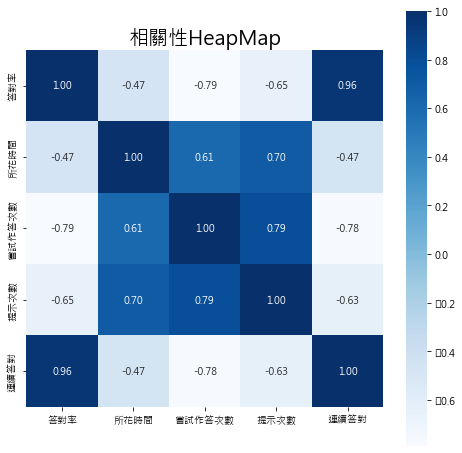

In [171]:
###### import seaborn as sns
import seaborn as sns
sns.set_context({"figure.figsize":(8,8)})
corr=data[['is_correct', 'total_sec_taken',
       'total_attempt_cnt', 'used_hint_cnt',"repeat_correct_pct"]].corr()
corr.index=["答對率","所花時間","嘗試作答次數","提示次數","連續答對"]
corr.columns=["答對率","所花時間","嘗試作答次數","提示次數","連續答對"]
sns.heatmap(data=corr,square=True, cmap="Blues", annot=True, fmt='.2f') 
plt.title("相關性HeapMap",fontsize=20)
plt.show()

In [172]:
data["difficulty_integer"]=0
data["difficulty_integer"][data.difficulty=="normal"]=1
data["difficulty_integer"][data.difficulty=="hard"]=2

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [173]:
data["difficulty_integer"].value_counts()

0    873
1    304
2    149
Name: difficulty_integer, dtype: int64

In [174]:
data_test=data[data.difficulty!="unset"]

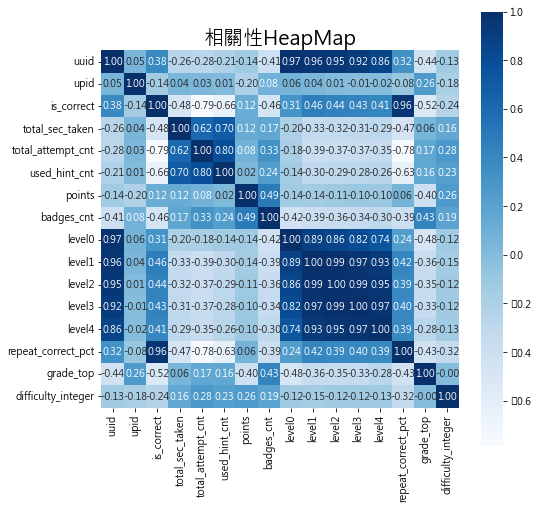

In [175]:
###### import seaborn as sns
import seaborn as sns
sns.set_context({"figure.figsize":(8,8)})
corr=data_test.loc[:, [x for x  in data.columns if x not in ["ucid",'learning_stage',"difficulty"]]].corr()
sns.heatmap(data=corr,square=True, cmap="Blues", annot=True, fmt='.2f')
plt.title("相關性HeapMap",fontsize=20)
plt.show()

In [176]:
data.to_csv("data2.csv")

In [589]:
data[data.uuid==208]

,ucid,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,level0,level1,level2,level3,level4,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,learning_stage,difficulty
1075,n/Gg32Tsd7+amD+EE0JzXjRaDJSjJNN6mu0t7j1Pd4E=,208,17,0.798077,168.567308,1.447115,0.735577,691092.600962,76.975962,125.0,34.0,26.0,18.0,5.0,0.0,0.0,0.0,5.0,20.0,14.0,125.0,25.0,0.0,0.0,7.0,12.0,junior,normal


# Final conclusion

- 從相關性熱圖來看，「所花時間」、「嘗試作答次數」、「提示次數」彼此呈正相關，與「答對率」、「連續答對率」呈負相關，可想而知，如果題目答對率較高的話，花的時間也較少、不太需要嘗試很多次、不用按很多提示，反之亦然。

- 由於「等級」特徵產生是以累積方式，也就是說只要有使用者該單元有升級到精熟（等級4），則等級0、等級1、等級2、等級3也會至少累積到一次，另外，level0+level1+level2+level3+level4=uuid，因此造成level0~level4及uuid呈現有強度的正相關。

# 個別使用者做答分析

In [177]:
data_all=pd.read_csv("data.csv")
data_all.sort_values("uuid",ascending=False).head(10)

,Unnamed: 0,ucid,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,learning_stage,difficulty
286,286,CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=,138169,24,0.96,12.48,1.05,0.02,169356.88,22.32,...,35330.00,20865.00,15190.00,7865.00,2821.00,1017.00,918.00,678.00,elementary,easy
664,664,TwyqyV1uJYlDAX8wX/PtTCVZEBo/APIVfTzzleGkNCQ=,124883,21,0.81,21.70,1.45,0.25,187754.86,24.34,...,33137.00,18238.00,12382.00,6308.00,2592.00,706.00,786.00,603.00,elementary,easy
966,966,hv7kHCAIdj7thZUmlqz553leG5bFNYgzXmLfB5m4Xvw=,124149,18,0.93,12.79,1.14,0.04,177077.07,22.95,...,32231.00,19003.00,13039.00,7006.00,2554.00,832.00,717.00,699.00,elementary,easy
575,575,PqQyQvOjvvozBCtlR/0pL8uxhe0K63IPiKYCi1tDG1o=,106195,20,0.91,20.86,1.14,0.07,188419.05,23.87,...,29128.00,16130.00,10844.00,5979.00,2204.00,736.00,786.00,537.00,elementary,easy
645,645,T7V7D8OgJF2BeuK/agj56BY9ibTmoqRbGdtwrt8a1SQ=,103968,16,0.93,8.93,1.12,0.05,191617.01,24.14,...,28768.00,15804.00,10650.00,5416.00,1928.00,726.00,530.00,539.00,elementary,easy
1184,1184,svTmVFY7kPYUWAdDc4l5Zaim90TY7RGkFLs/eaU4FVc=,86455,14,0.94,16.40,1.15,0.07,203518.44,24.99,...,22296.00,12764.00,8212.00,4109.00,1766.00,541.00,517.00,448.00,elementary,easy
1052,1052,lvobiTtwUsd1ylmrciW7NzJnmmcqFC1J9PmoZ6R8xK0=,76571,22,0.84,17.94,1.34,0.16,225850.28,27.94,...,19100.00,10931.00,6271.00,3134.00,1424.00,458.00,553.00,699.00,elementary,easy
999,999,jImuGvSym6odgRoYw7vgkq4HUbmJ1tDW9fq6bo/yN5s=,71943,23,0.90,23.61,1.23,0.14,224191.36,27.31,...,18666.00,10177.00,6012.00,3158.00,1419.00,431.00,380.00,400.00,elementary,easy
536,536,OVGQBBcCHSOyJ89uwY+z15n2iuZYrv8Tajf37jiGzqc=,71571,18,0.91,22.29,1.26,0.14,222831.41,26.69,...,18601.00,10650.00,6449.00,3293.00,1425.00,433.00,378.00,410.00,elementary,easy
1256,1256,w3a6Wk12CqIrUktZei2Z0W3Rf8xdgEdjIW9QX0MWIf8=,67796,20,0.91,20.85,1.21,0.09,226833.11,27.30,...,18348.00,10294.00,5852.00,2841.00,1263.00,449.00,365.00,445.00,elementary,easy


In [178]:
data_all.sort_values("uuid",ascending=False).tail(10)

,Unnamed: 0,ucid,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,learning_stage,difficulty
233,233,9xKPJypj9iNixPJpQ2i/OsHZXTb1JcFP70VkCCOrH38=,472,24,0.44,103.70,2.52,0.79,380491.15,65.70,...,0.00,0.00,45.00,38.00,275.00,106.00,7.00,0.00,junior,normal
1210,1210,toEj9DQe3d6eCqpUhPzaRUzZjuvoB6uu27TxH+ermwU=,440,17,0.70,57.72,2.03,1.08,424448.70,49.25,...,23.00,24.00,236.00,72.00,40.00,0.00,9.00,24.00,junior,easy
287,287,CVPAbATBJIcwj+W5tdHPMJPOXd7zjBzeCVdUuSchQOQ=,387,20,0.44,55.33,2.80,0.95,259436.91,68.84,...,0.00,12.00,15.00,0.00,269.00,91.00,0.00,0.00,junior,hard
121,121,49sbTmIMLfubZ+jwrUcdiWu5DciVkyQyCxSDPZcKAgk=,368,18,0.65,30.36,1.48,0.17,751485.99,88.67,...,51.00,43.00,218.00,23.00,0.00,0.00,8.00,18.00,junior,normal
284,284,CMyGDXUELzeplk/4CMeRIFdFeukLF5cACzMugP2ar2k=,363,20,0.54,36.11,2.41,0.81,184605.79,43.01,...,0.00,0.00,5.00,7.00,306.00,40.00,5.00,0.00,junior,normal
1071,1071,mrG4s2qdh44vRQsx7/T2OnjSJj8UzM23ODdwSHYMNFQ=,325,9,0.60,43.49,1.86,0.62,347490.97,44.79,...,0.00,15.00,0.00,35.00,153.00,50.00,18.00,48.00,junior,hard
31,31,/ejwQaTpw8saI8XVEo0mo08Yf2ko9KW5lwBJRlO8/dM=,266,40,0.48,69.11,2.08,1.00,302149.47,68.12,...,2.00,17.00,26.00,95.00,96.00,30.00,0.00,0.00,junior,normal
243,243,AWydRuHu2+cX0wAcWh9RcQJnBs4mFdeObcCzF1yM17A=,259,9,0.71,36.64,1.66,0.36,390487.26,48.02,...,0.00,5.00,0.00,3.00,128.00,56.00,11.00,0.00,junior,hard
807,807,ap9wOXDnXVFePVnnpscqo0DFNvaLEzP+JC5FyWOxYI8=,249,20,0.48,46.63,2.78,0.49,288177.01,75.53,...,0.00,0.00,6.00,0.00,123.00,107.00,3.00,6.00,junior,hard
1075,1075,n/Gg32Tsd7+amD+EE0JzXjRaDJSjJNN6mu0t7j1Pd4E=,208,17,0.80,168.57,1.45,0.74,691092.60,76.98,...,20.00,14.00,125.00,25.00,0.00,0.00,7.00,12.00,junior,normal


In [179]:
Log_Problem[Log_Problem.ucid=="CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg="].groupby("uuid").agg({"upid":"count"}).sort_values("upid",ascending=False)

,upid
uuid,
NqfcdeC8ukIZpinWxRVfkXGSSCoHNl6Kz5NLa7X0A+o=,199
GSO0CVv6/HDJ9MTXB8pILBWwJO0u2c5Yg7CpRegOqp8=,170
JGU29tWhb/lyOlHdt8AH4Xo2AXU/CxvjOZKV5/q3UJU=,155
lt4/9KIbRh2ciwI1tN3/yttlil5M7p5PmKtN4vCLVwQ=,129
YyfI70ulDxm8Fm232dXM9biOctXbtVnJgvCKTi3mdhg=,128
...,...
q5LO7SUtPcKJTVzCqYeeDRsTrn0A+0ZMk6u6J4eJgqk=,1
gZJSUfvqIuYNzN4UKa83/vUFosTGpD58e+8McW11OAo=,1
WGUgZExI/3h8yC/NMXJv8z9EchMUnb6YszkRWRhaxzg=,1


# 簡單題：【基礎】連除計算：含有括號

In [180]:
Info_Content[Info_Content.content_pretty_name=="【基礎】連除計算：含有括號"]

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
26,LCz/rIBPDjV+9tcB8P8On0xwPups1k9t8fcMBsc7rRs=,【基礎】連除計算：含有括號,Exercise,easy,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,4cISKCt3nXWe4r6Q8bzjOiL2EYYsZyT6Z0mNNJckqEc=,oJG/wS64igqXR4IZF4VVKeWCMXGQyEuvMRpLuuC9FuI=


In [181]:
easy_data_1=Log_Problem[Log_Problem.ucid=="LCz/rIBPDjV+9tcB8P8On0xwPups1k9t8fcMBsc7rRs="]

In [182]:
easy_data_1["date"]=pd.DatetimeIndex(easy_data_1["timestamp_TW"]).date

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


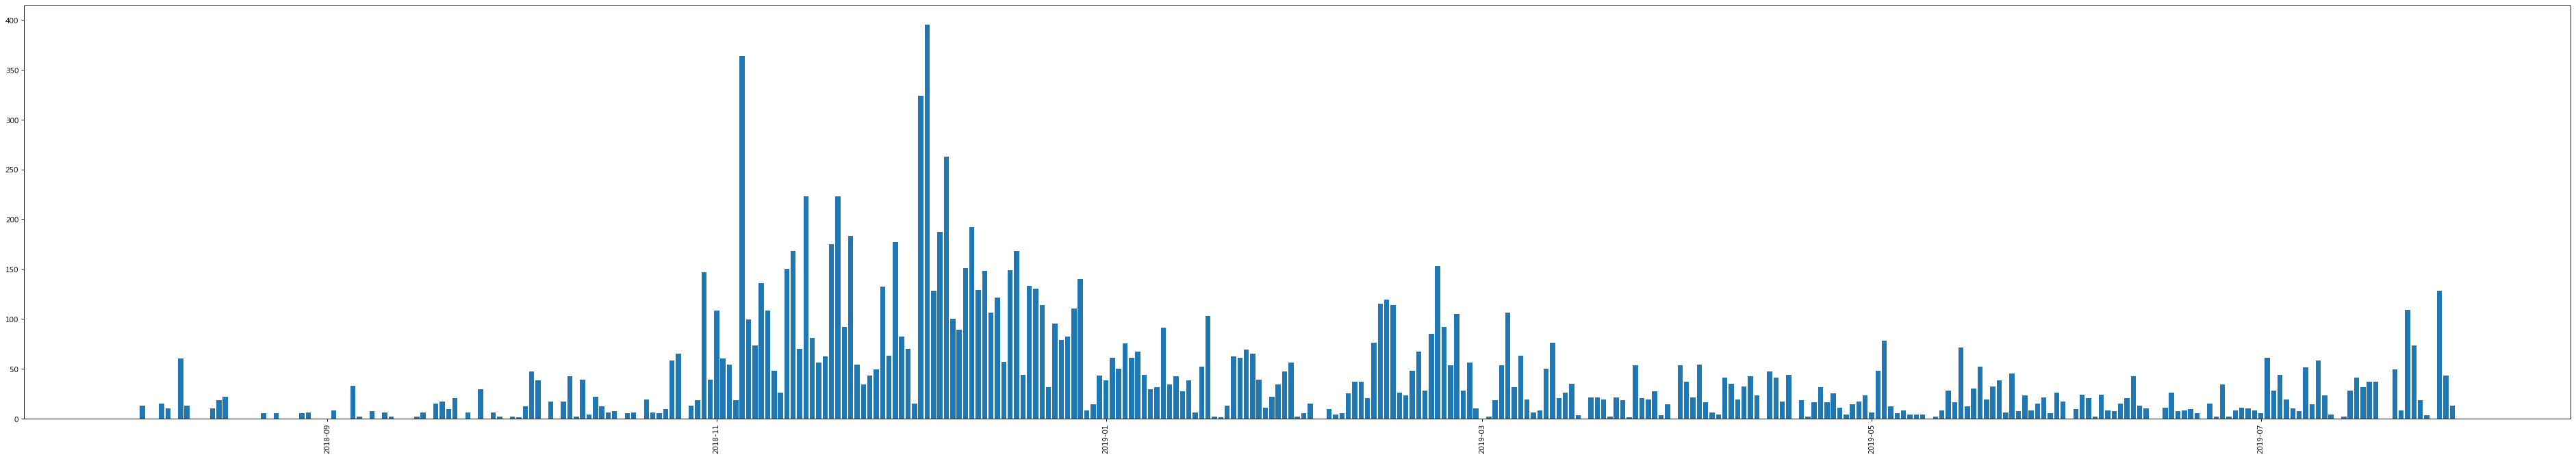

In [183]:
figure(figsize=(60, 10), dpi=80)
plt.bar(easy_data_1.date.value_counts().sort_index().index,easy_data_1.date.value_counts().sort_index())
plt.xticks(rotation=90)
plt.show()

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


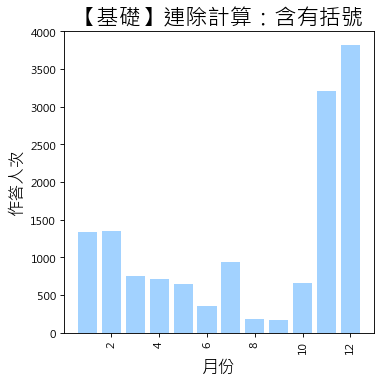

In [210]:
easy_data_1["month"]=easy_data_1["timestamp_TW"].str.extract(r"((?<=-).+(?=-))")
easy_data_1["month"]=easy_data_1["month"].astype(int)
figure(figsize=(5, 5), dpi=80)
plt.bar(easy_data_1["month"].value_counts().sort_index().index,easy_data_1["month"].value_counts().sort_index(),color="#A2D2FF")
plt.title("【基礎】連除計算：含有括號",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("月份",fontsize=15)
plt.ylabel("作答人次",fontsize=15)
plt.show()

In [198]:
user_done_data=easy_data_1.groupby("uuid").agg({"upid":"count","is_correct":np.mean,"total_sec_taken":np.mean,"total_attempt_cnt":np.mean,"used_hint_cnt":np.mean,"level":np.max}).reset_index()
user_done_data.sort_values("upid",ascending=False).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
862,XXFLh3UMIZPFvLlQdLTGggQw8lKk6GBYgFoOjf83gT0=,90,0.20,11.53,1.53,1.14,0
316,Au8ljS3ktfI7WwpsCVv63GdYyTJ31ZGEFZ619oucRsc=,84,0.31,17.81,3.27,1.75,1
962,cQZKqpGpUTIPGAumJX1Fr8pO0X35h9RwfwV1PTMXeMQ=,82,0.73,35.46,1.50,0.27,4
576,LNN65H+5vvNutAs1VepfSKGKK3ePz5sc4snss8F7ECU=,74,0.57,33.20,1.86,0.61,4
66,18JnwCu6mQz8qJ7x/cahDF3qU9PsEF+tAnyF2RbF1fw=,69,0.75,28.68,1.67,0.42,3


In [199]:
user_done_data.sort_values("is_correct",ascending=False).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
1536,zz8RkacjSwdqtf9ARTotDb8AMmsVBcpAxcIV7K/HF+g=,5,1.00,17.80,1.00,0.00,1
913,ZpL8kk+KLF7DKoWOtE/xwY9zXnAKtFbPrZjy1ruDRs8=,2,1.00,39.00,1.00,0.00,0
884,YbgEke1xaoguY2BldvDg553puGYEQV10xoDxcbRA98Q=,4,1.00,50.50,1.00,0.00,0
891,Z949Xw0O3LpwC8umTPwz+OAE2cNMhFf6Tqgm1Xg7/JY=,5,1.00,8.40,1.00,0.00,1
315,At8+kUYe3IFAxYhDYLemA9WSA9wK5t0YJYQsj2kNy/s=,11,1.00,12.82,1.00,0.00,4


<AxesSubplot:>

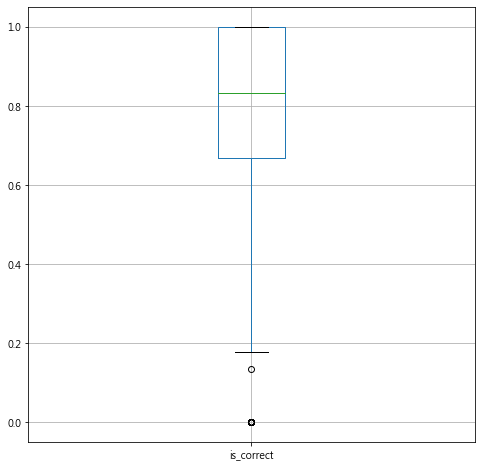

In [200]:
user_done_data.boxplot("is_correct")

In [211]:
user_done_data.sort_values("total_sec_taken",ascending=False).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
1243,nv4L5iG0bmcgZ0v3Dmii3PtFzutajjotZNenCMXH/2U=,1,0.00,445.00,7.00,4.00,0
276,9R94m5RWM13jV0h+WtYb9CrIXp/xAJ1Jd32oUxXFRrU=,1,1.00,423.00,1.00,0.00,0
370,D3nKS7X/ovvGe05tiOGzNHwttnsAT9LvdaR5WCB7kII=,5,1.00,237.40,1.00,0.00,0
420,F1ufjtcumoqXvDT9G2/pJPDFbPyoQTCMLRTSdqkKlFQ=,2,1.00,202.00,1.00,0.00,0
861,XWtBSAxKNlx/3ABaMCDAjR7ltpyTmuHLx4lOO5nh2Yk=,7,0.57,184.86,1.43,0.57,0


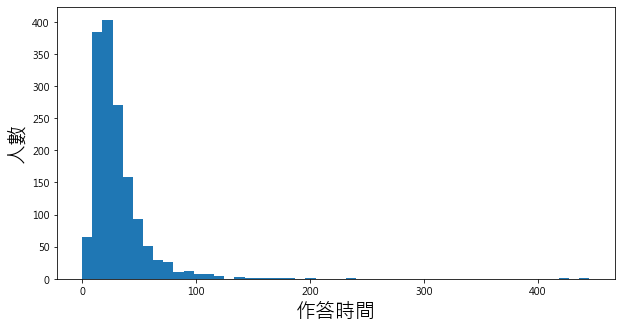

In [212]:
plt.figure(figsize=(10,5))
plt.hist(user_done_data.total_sec_taken,bins=50)
plt.xlabel("作答時間",fontsize=20)
plt.ylabel("人數",fontsize=20)
plt.show()

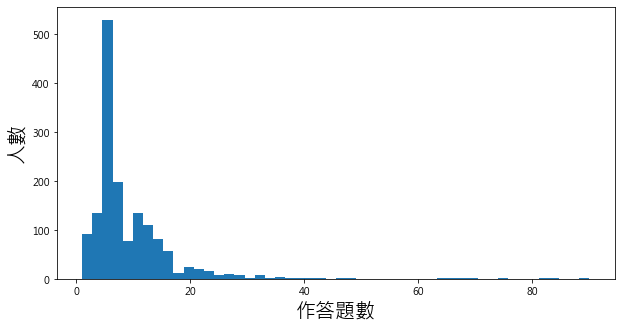

1


In [213]:
plt.figure(figsize=(10,5))
plt.hist(user_done_data.upid,bins=50)
plt.xlabel("作答題數",fontsize=20)
plt.ylabel("人數",fontsize=20)
plt.show()
print(user_done_data.upid.min())

In [214]:
best_level=user_done_data[user_done_data.level==4]

In [215]:
best_level.sort_values("total_sec_taken",ascending=False).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
572,LG5TmWzH6q6gTIRQPCSgu98LomDFnFNG5R4wRkqgo4k=,10,0.90,82.70,1.20,0.00,4
1447,wFSFrDaljzbrKilzoZOKtMiDcmnPZ/5ZuHpVbGazy+Y=,11,0.91,72.82,1.36,0.18,4
552,KTdc3nIbXw+jm/LCOc39jrWCzwmfYpnda9jrKobQ4lc=,14,0.79,60.14,1.21,0.00,4
751,TML8pYu51znAg8HHJqvWCE5WI1OVGFAE2udwMZzJ540=,16,0.81,57.88,1.56,0.44,4
1039,fdlumA1kli5gMTbqQhR6icDaju9a7OdN5IyZ6GYYdF0=,11,1.00,55.45,1.00,0.00,4


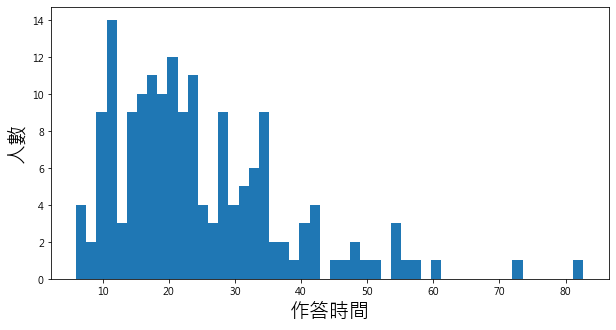

In [216]:
plt.figure(figsize=(10,5))
plt.hist(best_level.total_sec_taken,bins=50)
plt.xlabel("作答時間",fontsize=20)
plt.ylabel("人數",fontsize=20)
plt.show()

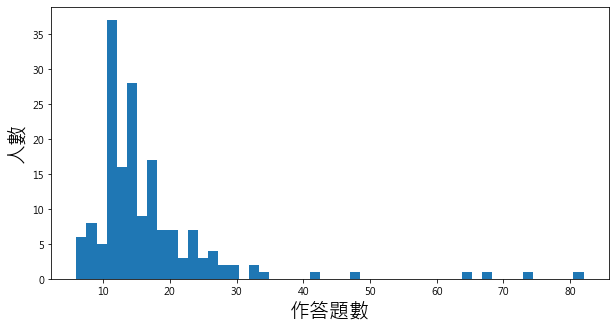

6


In [217]:
plt.figure(figsize=(10,5))
plt.hist(best_level.upid,bins=50)
plt.xlabel("作答題數",fontsize=20)
plt.ylabel("人數",fontsize=20)
plt.show()
print(best_level.upid.min())

<AxesSubplot:>

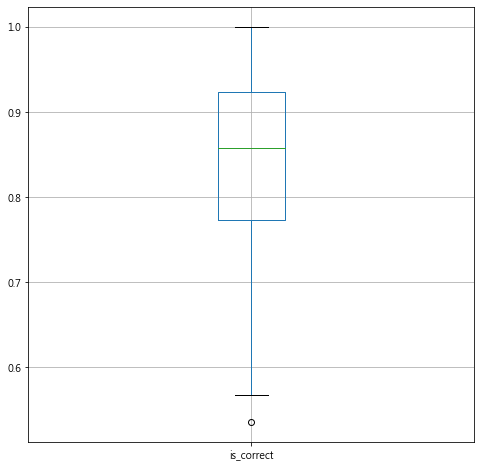

In [218]:
best_level.boxplot("is_correct")

In [219]:
best_level.sort_values(["is_correct","total_sec_taken"],ascending=[False,True]).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
748,TFxee0FtgjWob+Dd1o+gSbXg9htOWJqMbX76dkKMyy0=,11,1.00,6.00,1.00,0.00,4
1177,lXg3BwHpqzMH4dOPk6jyUmrb1F++AiVr0iOrO/L4a6A=,9,1.00,6.89,1.00,0.00,4
1419,ufY02eZuUmTSH4zl/gz9e6TId8+2jXvTb8nBrHfw0ws=,11,1.00,7.45,1.00,0.00,4
718,RDG5hfSbUMf2mV22bLi+o/W8aC1nXnuOrJpavtnD6D4=,11,1.00,9.09,1.00,0.00,4
52,0IrKilgNIOaW0CuLiO+bcBtPkBFZP54Y/ImW5fxEFtM=,11,1.00,10.00,1.00,0.00,4


In [220]:
best_level.sort_values(["is_correct","total_sec_taken"],ascending=[True,False]).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
1413,uUCODYM8jkSCYRuGpncmifSEfhRlumUoLkKrzkpmIaI=,28,0.54,28.43,1.75,0.61,4
576,LNN65H+5vvNutAs1VepfSKGKK3ePz5sc4snss8F7ECU=,74,0.57,33.20,1.86,0.61,4
1409,uPanyhV2EVjiHUkUF0BbqOoXBUj3Eg0GBk3+R79zZyg=,27,0.63,18.74,1.89,0.59,4
1460,whsIMzDIM60emiGf9nc2JOEme1SE76IdbhYgwZDSD2s=,64,0.64,27.62,1.66,0.39,4
1378,t2Z5FEy8zEhRJyoNaoSPPr+urci15gUzarxV32ZAHGA=,14,0.64,42.64,1.43,0.64,4


In [221]:
user_done_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   uuid               1537 non-null   object 
 1   upid               1537 non-null   int64  
 2   is_correct         1537 non-null   float64
 3   total_sec_taken    1537 non-null   float64
 4   total_attempt_cnt  1537 non-null   float64
 5   used_hint_cnt      1537 non-null   float64
 6   level              1537 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 84.2+ KB


# 難題：【進階】因數與公因數綜合習題

In [222]:
Info_Content[Info_Content.content_pretty_name=="【進階】兩步驟問題併式：連乘、連除、乘除綜合習題"]

,ucid,content_pretty_name,content_kind,difficulty,subject,learning_stage,level1_id,level2_id,level3_id,level4_id
77,RtjkuNmuzBI2VhWYRk43wMkzhzIQD6YstXG1ZsypAZU=,【進階】兩步驟問題併式：連乘、連除、乘除綜合習題,Exercise,hard,math,elementary,aH0Dz0KdH9gio7rrcGRHvrmd9vcd/0WJbeEFB7qeUKA=,ICgke8JJv5eapCPwyj1aco8PEtoBkUbTZYIqxmYtqBk=,4cISKCt3nXWe4r6Q8bzjOiL2EYYsZyT6Z0mNNJckqEc=,yAzQR919g6E/LcFFdUOg/UDlVYQtRNHvS19zOJV2V/o=


In [223]:
hard_data_1=Log_Problem[Log_Problem.ucid=="RtjkuNmuzBI2VhWYRk43wMkzhzIQD6YstXG1ZsypAZU="]

In [224]:
hard_data_1["date"]=pd.DatetimeIndex(hard_data_1["timestamp_TW"]).date

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [225]:
hard_data_1.date.value_counts().sort_index()

2018-08-01     5
2018-08-05     6
2018-08-07     4
2018-08-09    14
2018-08-15     7
              ..
2019-07-24    63
2019-07-25    48
2019-07-26    12
2019-07-30    37
2019-07-31    40
Name: date, Length: 193, dtype: int64

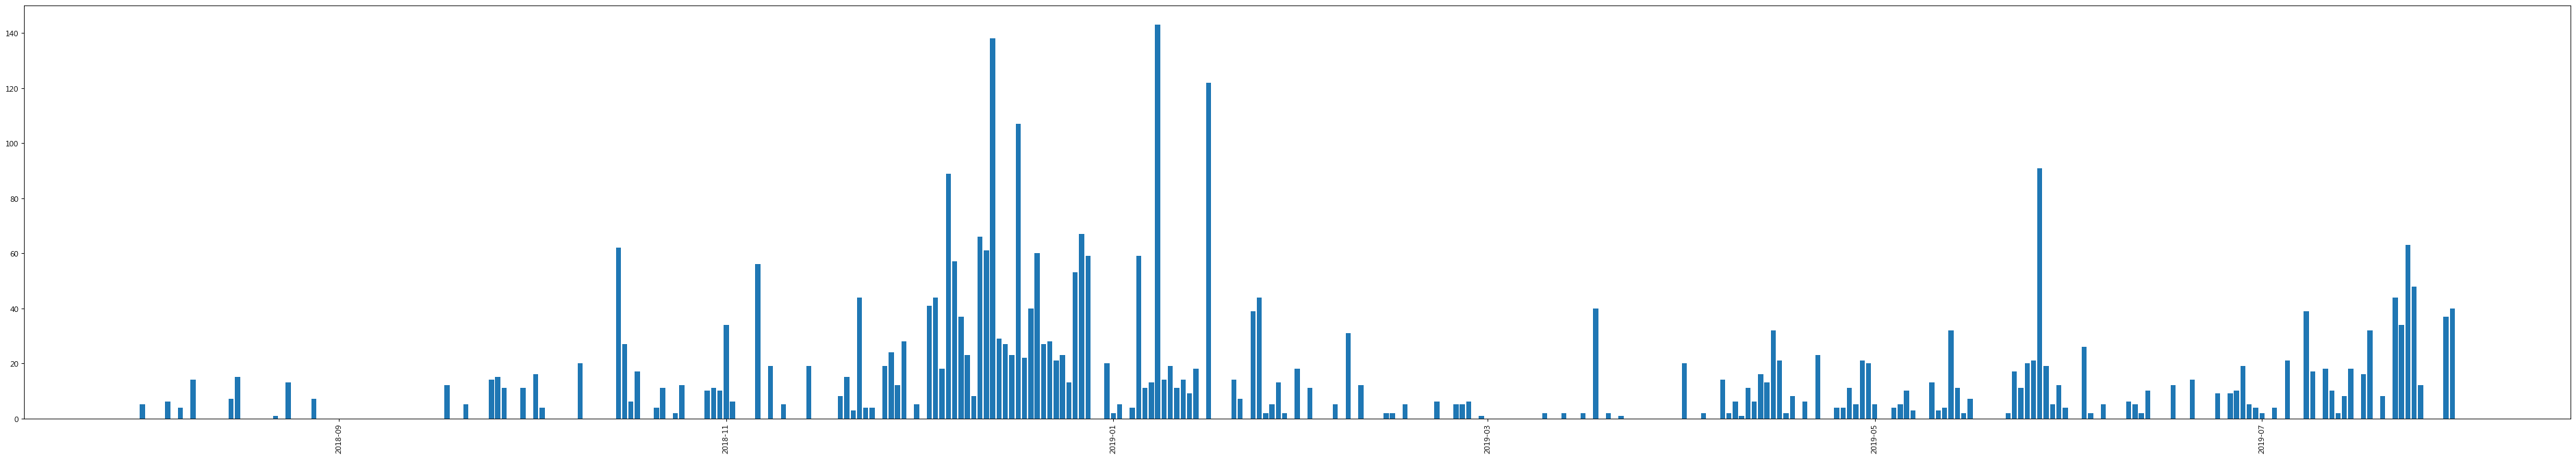

In [227]:
figure(figsize=(60, 10), dpi=80)
plt.bar(hard_data_1.date.value_counts().sort_index().index,hard_data_1.date.value_counts().sort_index())
plt.xticks(rotation=90)
plt.show()

c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\kevin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


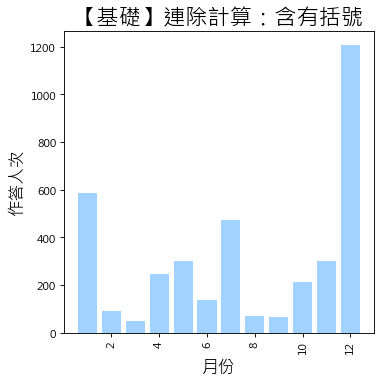

In [228]:
hard_data_1["month"]=hard_data_1["timestamp_TW"].str.extract(r"((?<=-).+(?=-))")
hard_data_1["month"]=hard_data_1["month"].astype(int)
figure(figsize=(5, 5), dpi=80)
plt.bar(hard_data_1["month"].value_counts().sort_index().index,hard_data_1["month"].value_counts().sort_index(),color="#A2D2FF")
plt.title("【基礎】連除計算：含有括號",fontsize=20)
plt.xticks(rotation=90)
plt.xlabel("月份",fontsize=15)
plt.ylabel("作答人次",fontsize=15)
plt.show()

In [231]:
user_done_data=hard_data_1.groupby("uuid").agg({"upid":"count","is_correct":np.mean,"total_sec_taken":np.mean,"total_attempt_cnt":np.mean,"used_hint_cnt":np.mean,"level":np.max}).reset_index()
user_done_data.sort_values("upid",ascending=False).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
83,AI0fs5ag3NX3F7VLG+RlhdDsIKko+iS5KEzsIpumtGg=,49,0.41,26.00,1.22,0.59,1
128,GcR/cCTjNl9HuHn7jq3rjrALNdo5nL0CP31bYb3/Rqs=,45,0.44,41.60,4.51,1.00,2
335,noaQE5C23TSo0jw5tMBHn6OVcEq3WD/F8TWBoB2leM0=,41,0.59,39.68,3.71,0.59,3
154,Kqd5+F+V2JoG7sfT2B8XrjXa+j3VsMYUcehbkvehBIE=,35,0.37,53.51,4.66,1.29,1
231,UlTWq+fPusJ++4TVY1NdC5uDcEwQ3yoLylECJWMjuvs=,34,0.56,38.35,5.35,0.65,3


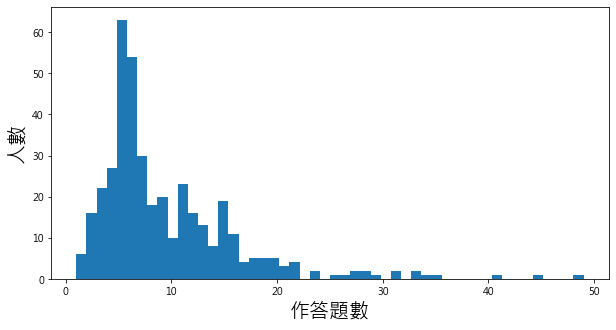

1


In [232]:
plt.figure(figsize=(10,5))
plt.hist(user_done_data.upid,bins=50)
plt.xlabel("作答題數",fontsize=20)
plt.ylabel("人數",fontsize=20)
plt.show()
print(user_done_data.upid.min())

In [233]:
user_done_data.sort_values("total_sec_taken",ascending=False).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
208,S6lmigy2OrAb+/2cJVgGA90o7AKpznQhQRy4q5uND9Y=,1,0.00,554.00,2.00,0.00,0
88,AoGMomQjh5M4XTMQ1KWMfxS5TA6uK1Fw3OHRweSymzc=,6,0.83,189.50,1.50,0.33,1
142,ImXBdAIuawZwI/IlmN9wmEg+9gREVAcUzS1/qSb8m4U=,2,0.00,183.00,7.00,2.00,0
181,OLfV4Ftr2PGP/gf6sDDIbqXQjvVJGCMNtlI7VJMUo0E=,4,0.25,182.00,2.00,1.25,0
312,kLNdEHROMI3wY1fEWawNwnNKAskoYKIPRbgTJ7XZ89g=,5,1.00,167.80,1.00,0.00,1


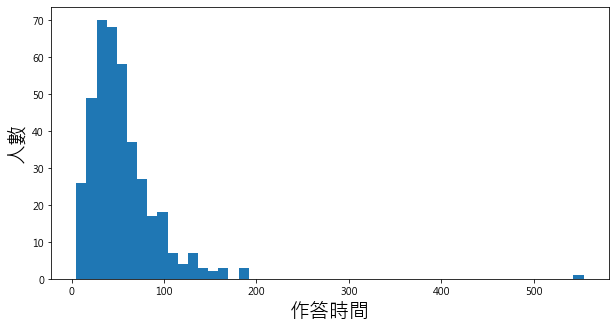

In [234]:
plt.figure(figsize=(10,5))
plt.hist(user_done_data.total_sec_taken,bins=50)
plt.xlabel("作答時間",fontsize=20)
plt.ylabel("人數",fontsize=20)
plt.show()

In [235]:
user_done_data.sort_values("is_correct",ascending=False).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
399,zcICwT1qA656kjdlUhEemJvBbW53tiAEAZS0CoIBqKs=,3,1.00,7.00,1.00,0.00,0
250,XLBTDeJuCtir4aJzm2E0VYErj19lQXi0mP3/C0st2pk=,5,1.00,50.20,1.00,0.00,1
228,URhaVL41N9sWmhzS8iHiLvemxMsssqDzUbzHimfbMWg=,2,1.00,13.00,1.00,0.00,0
230,UaPcwcDPFiPULoIiRTe0419KAeiM0t1CneLFFp8BVAo=,5,1.00,20.80,1.00,0.00,1
232,VCJ5ZD0nqSdQsPNORrmmLliCjJ3iBwIQVKIeBPoJc2M=,5,1.00,31.80,1.00,0.00,1


<AxesSubplot:>

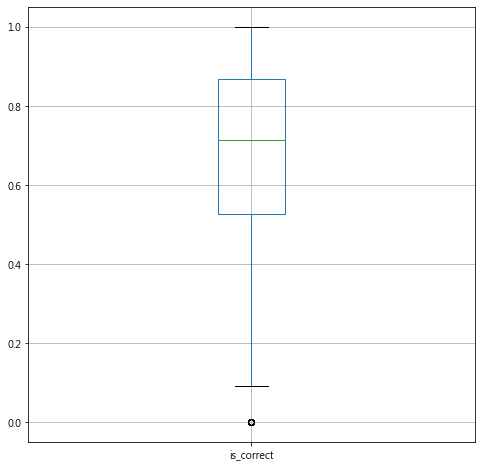

In [236]:
user_done_data.boxplot("is_correct")

In [237]:
best_level=user_done_data[user_done_data.level==4]

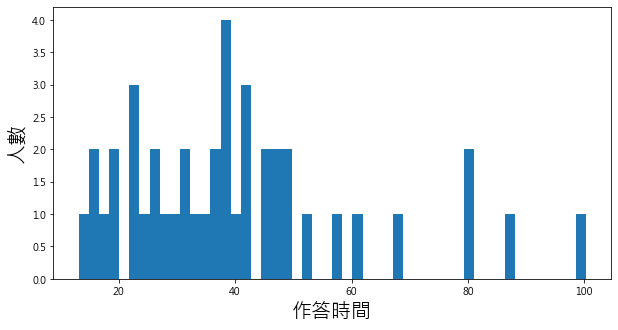

In [238]:
plt.figure(figsize=(10,5))
plt.hist(best_level.total_sec_taken,bins=50)
plt.xlabel("作答時間",fontsize=20)
plt.ylabel("人數",fontsize=20)
plt.show()

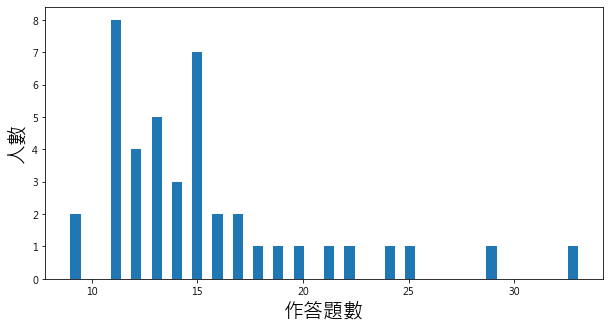

9


In [239]:
plt.figure(figsize=(10,5))
plt.hist(best_level.upid,bins=50)
plt.xlabel("作答題數",fontsize=20)
plt.ylabel("人數",fontsize=20)
plt.show()
print(best_level.upid.min())

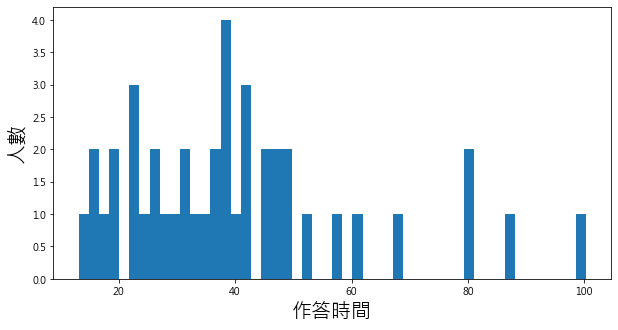

In [240]:
plt.figure(figsize=(10,5))
plt.hist(best_level.total_sec_taken,bins=50)
plt.xlabel("作答時間",fontsize=20)
plt.ylabel("人數",fontsize=20)
plt.show()

<AxesSubplot:>

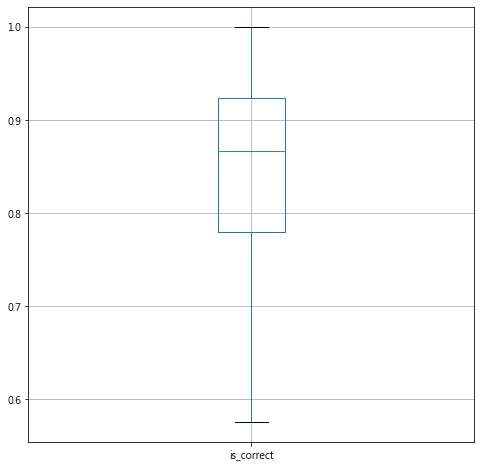

In [241]:
best_level.boxplot("is_correct")

In [242]:
best_level.sort_values("total_sec_taken",ascending=False).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
10,1+m1cNcEdMh6ojK0FY/MhGaIwgyPD1IMt9evkF28/XQ=,15,0.87,100.27,1.27,0.13,4
262,Z99QzW+9oo/p2XQ1ZJ2yICiLOoUy0kPNPBRkCcoUqE0=,13,0.85,86.62,1.62,0.31,4
352,r6kS4F8pWkveph6S0J5owJEoX4QMxnVkMRdji8KLfns=,14,0.79,80.50,1.29,0.29,4
315,kfrs9cV5Jnk+4uPSuT8CEZqY39im7SP2lwEWKt07sQA=,29,0.72,79.48,1.10,0.48,4
330,mzIuPqJIQy94DmoZ9PzjcycXFKCvhSwjUQ4AEKnrRII=,17,0.76,67.59,1.24,0.47,4


In [243]:
best_level.sort_values(["is_correct","total_sec_taken"],ascending=[True,False]).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
169,MqXXmq5N2yIbY7S4IfzwHrJnPNKbgDl4cSBKrDvalwU=,33,0.58,22.52,1.58,0.36,4
141,IV6nzskENZsF0iRUM6Kn9mW58m9Q7Ve7cYZ/7p0d92c=,22,0.59,29.41,10.18,0.68,4
289,e32FUi9ze2xdqq9b7TIor5vNSqek55NEg7LZpsaUJQs=,16,0.62,45.00,2.69,0.62,4
20,2DgYRbWCiikeakJSV/25x4wmmm4UeLgFDeKGY24K8bY=,25,0.68,40.48,1.76,0.68,4
274,b/7+vruO1CxLTSgNbb5lP7vxfpE+8A2krAhgxbPscf4=,21,0.71,48.71,2.33,0.38,4


In [244]:
best_level.sort_values(["is_correct","total_sec_taken"],ascending=[False,True]).head()

,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,level
271,aq7pVQJMk514YRibcCYVx5/+ThMDoHa2Ge+tiBx6iYk=,11,1.00,13.09,1.00,0.00,4
373,ufY02eZuUmTSH4zl/gz9e6TId8+2jXvTb8nBrHfw0ws=,11,1.00,14.91,1.00,0.00,4
255,XzjV7d232DDbc3fwZH/6g09F/T5HKO2qzA2W/vsSPaQ=,11,1.00,18.36,1.00,0.00,4
91,At8+kUYe3IFAxYhDYLemA9WSA9wK5t0YJYQsj2kNy/s=,9,1.00,33.67,1.00,0.00,4
245,WYpOCr2NkeXKTPczWdXdcveaHABl81FSsfPM/1kq7R4=,11,1.00,35.64,1.00,0.00,4


# 使用者0(國小題目基礎/最多做題)

In [255]:
user_sample=Log_Problem[(Log_Problem.ucid=="CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=")&(Log_Problem.uuid=="NqfcdeC8ukIZpinWxRVfkXGSSCoHNl6Kz5NLa7X0A+o=")]

In [256]:
user_info(user_sample)

> 題目： ['NqfcdeC8ukIZpinWxRVfkXGSSCoHNl6Kz5NLa7X0A+o=']
> 使用者標號： ['CPI+5YCeEmhqdk6znJeii6jJUNl1QWGEvwCUJ6uLflg=']
> 年級： [3]
> 徽章數： [152]
> 能量數： [839613]
> 升級到精熟時間： 2 days 23:00:00
> 做題數量： 199
> 題庫題數： 24
> 答對率： 1.0
> 錯題總數： 0
> 使用提示： 4
> 使用提示： 9
> 退級次數： 0
> 升級次數： 4


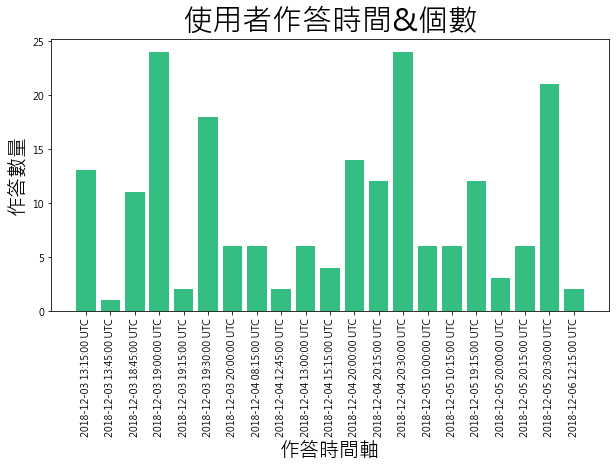

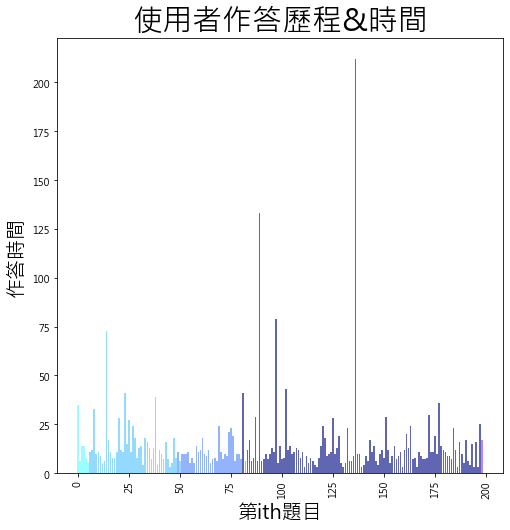

In [257]:
user_plt(user_sample)

In [258]:
user_table(user_sample)

**答錯歷程table：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level


**題目作答時間超過50秒的table：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
2784059,2018-12-03 18:45:00 UTC,yliu6+3djYJNLzAJkhv40S+w+qdicKROloguwkcvmjo=,True,73,1,0,False,NaN,NaN,1
2785912,2018-12-04 15:15:00 UTC,o2SzUg3fgeSGlSVQB60+lumNfWQkjXorqaEnEEL6oK4=,True,133,1,0,False,NaN,NaN,3
2784639,2018-12-04 20:00:00 UTC,KNJSRq6acFCWN+lGElRMksPM7kl+4ht1EZPHIU0mrVs=,True,79,1,0,False,NaN,NaN,3
2784654,2018-12-04 20:30:00 UTC,QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk=,True,212,1,1,True,NaN,NaN,3


**升級/答錯&答錯/作答時間table：


level                total_sec_taken        \
level                                  0   1   2   3  4               0     1   
timestamp_TW            is_correct                                              
2018-12-03 13:15:00 UTC True           6   7   0   0  0           13.67 13.00   
2018-12-03 13:45:00 UTC True           0   1   0   0  0            0.00  6.00   
2018-12-03 18:45:00 UTC True           0  11   0   0  0            0.00 21.36   
2018-12-03 19:00:00 UTC True           0  24   0   0  0            0.00 13.12   
2018-12-03 19:15:00 UTC True           0   1   1   0  0            0.00  6.00   
2018-12-03 19:30:00 UTC True           0   0  18   0  0            0.00  0.00   
2018-12-03 20:00:00 UTC True           0   0   6   0  0            0.00  0.00   
2018-12-04 08:15:00 UTC True           0   0   6   0  0            0.00  0.00   
2018-12-04 12:45:00 UTC True           0   0   1   1  0            0.00  0.00   
2018-12-04 13:00:00 UTC True           0   0   0   6  0            0.00  0.00   
2018-12-04 15:15:00 UTC True           0   0   0   4  0            0.00  0.00   
2018-12-04 20:00:00 UTC True           0   0   0  14  0            0.00  0.00   
2018-12-04 20:15:00 UTC True           0   0   0  12  0            0.00  0.00   
2018-12-04 20:30:00 UTC True           0   0   0  24  0            0.00  0.00   
2018-12-05 10:00:00 UTC True           0   0   0   6  0            0.00  0.00   
2018-12-05 10:15:00 UTC True           0   0   0   6  0            0.00  0.00   
2018-12-05 19:15:00 UTC True           0   0   0  12  0            0.00  0.00   
2018-12-05 20:00:00 UTC True           0   0   0   3  0            0.00  0.00   
2018-12-05 20:15:00 UTC True           0   0   0   6  0            0.00  0.00   
2018-12-05 20:30:00 UTC True           0   0   0  21  0            0.00  0.00   
2018-12-06 12:15:00 UTC True           0   0   0   1  1            0.00  0.00   

                                                    
level                                  2     3   4  
timestamp_TW            is_correct                  
2018-12-03 13:15:00 UTC True        0.00  0.00   0  
2018-12-03 13:45:00 UTC True        0.00  0.00   0  
2018-12-03 18:45:00 UTC True        0.00  0.00   0  
2018-12-03 19:00:00 UTC True        0.00  0.00   0  
2018-12-03 19:15:00 UTC True       11.00  0.00   0  
2018-12-03 19:30:00 UTC True        9.50  0.00   0  
2018-12-03 20:00:00 UTC True       13.67  0.00   0  
2018-12-04 08:15:00 UTC True       12.50  0.00   0  
2018-12-04 12:45:00 UTC True        6.00 41.00   0  
2018-12-04 13:00:00 UTC True        0.00 13.00   0  
2018-12-04 15:15:00 UTC True        0.00 39.00   0  
2018-12-04 20:00:00 UTC True        0.00 17.43   0  
2018-12-04 20:15:00 UTC True        0.00  7.50   0  
2018-12-04 20:30:00 UTC True        0.00 19.46   0  
2018-12-05 10:00:00 UTC True        0.00 10.33   0  
2018-12-05 10:15:00 UTC True        0.00 12.50   0  
2018-12-05 19:15:00 UTC True        0.00 10.92   0  
2018-12-05 20:00:00 UTC True        0.00  9.00   0  
2018-12-05 20:15:00 UTC True        0.00 14.33   0  
2018-12-05 20:30:00 UTC True        0.00 11.48   0  
2018-12-06 12:15:00 UTC True        0.00 25.00  17

**該單元各小題作答狀況table：


,upid,is_correct,total_sec_taken,total_attempt_cnt
14,QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk=,1.00,39.12,1.00
17,o2SzUg3fgeSGlSVQB60+lumNfWQkjXorqaEnEEL6oK4=,1.00,30.75,1.00
22,vsGlLPd9C58B8myBoGMGre2pDHjh62eRjsqX57D98fU=,1.00,21.12,1.12
12,OE6ac/KSBYPUdQIN5KjVZS1QSxWiKqis6mIYB0s6kV4=,1.00,20.50,1.00
15,T0lKD4AH6rPEz3GLMHAFA1og/JDibwDz+nMx7gbKryE=,1.00,19.33,1.00
23,yliu6+3djYJNLzAJkhv40S+w+qdicKROloguwkcvmjo=,1.00,18.00,1.25
8,KNJSRq6acFCWN+lGElRMksPM7kl+4ht1EZPHIU0mrVs=,1.00,15.70,1.20
11,NSAQsZFvX/DltwPya1WQQfFY/w3yOnAawoTgVVvJKdI=,1.00,15.00,1.00
19,pdAWy6nd9Iovdb2ZB/0lRMI3CPqHeCO3kwhuBFuWGYA=,1.00,14.00,1.00
2,85HZbMmOa3r2qyNdMrMuzi3Qrh2Je4ufiUPg689Antc=,1.00,13.25,1.00


**花最多時間的小題tablel：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
2787341,2018-12-03 18:45:00 UTC,QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk=,True,11,1,0,False,NaN,NaN,1
2787199,2018-12-03 19:00:00 UTC,QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk=,True,10,1,0,False,NaN,NaN,1
2787906,2018-12-03 19:30:00 UTC,QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk=,True,10,1,0,False,NaN,NaN,2
2786334,2018-12-04 13:00:00 UTC,QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk=,True,17,1,0,False,NaN,NaN,3
2787343,2018-12-04 20:30:00 UTC,QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk=,True,24,1,0,False,NaN,NaN,3
2784654,2018-12-04 20:30:00 UTC,QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk=,True,212,1,1,True,NaN,NaN,3
2785224,2018-12-05 19:15:00 UTC,QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk=,True,20,1,0,False,NaN,NaN,3
2784918,2018-12-05 20:30:00 UTC,QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk=,True,9,1,0,False,NaN,NaN,3


# 使用者1(國小題目基礎/答對率高)

In [259]:
user_sample=Log_Problem[(Log_Problem.ucid=="LCz/rIBPDjV+9tcB8P8On0xwPups1k9t8fcMBsc7rRs=")&(Log_Problem.uuid=="TFxee0FtgjWob+Dd1o+gSbXg9htOWJqMbX76dkKMyy0=")]

In [260]:
print("> 題目：",user_sample["uuid"].unique())
print("> 使用者標號：",user_sample["ucid"].unique())
print("> 年級：",user_sample["user_grade"].unique())
print("> 徽章數：",user_sample["badges_cnt"].unique())
print("> 能量數：",user_sample["points"].unique())
print("> 升級到精熟時間：",pd.to_datetime(user_sample["timestamp_TW"].max())-pd.to_datetime(user_sample["timestamp_TW"].min()))
print("> 做題數量：",user_sample["uuid"].count())
print("> 題庫題數：",len(user_sample["upid"].unique()))
print("> 答對率：",round(user_sample.is_correct.mean(),4))
print("> 錯題總數：",user_sample.is_correct[user_sample.is_correct==0].count())
print("> 使用提示：",user_sample["used_hint_cnt"].sum())
print("> 使用提示：",user_sample.total_attempt_cnt[user_sample.total_attempt_cnt>1].count())
print("> 退級次數：",user_sample["is_downgrade"].sum())
print("> 升級次數：",user_sample["is_upgrade"].sum())

> 題目： ['TFxee0FtgjWob+Dd1o+gSbXg9htOWJqMbX76dkKMyy0=']
> 使用者標號： ['LCz/rIBPDjV+9tcB8P8On0xwPups1k9t8fcMBsc7rRs=']
> 年級： [6]
> 徽章數： [35]
> 能量數： [1500897]
> 升級到精熟時間： 16 days 00:15:00
> 做題數量： 11
> 題庫題數： 11
> 答對率： 1.0
> 錯題總數： 0
> 使用提示： 0
> 使用提示： 0
> 退級次數： 0
> 升級次數： 4


In [261]:
user_sample=user_sample.sort_values(["timestamp_TW","level"]).reset_index()
user_sample[["timestamp_TW","total_sec_taken","total_attempt_cnt","level"]]

,timestamp_TW,total_sec_taken,total_attempt_cnt,level
0,2018-12-04 09:15:00 UTC,6,1,0
1,2018-12-04 09:15:00 UTC,6,1,0
2,2018-12-04 09:15:00 UTC,12,1,0
3,2018-12-04 09:15:00 UTC,9,1,0
4,2018-12-04 09:15:00 UTC,3,1,1
5,2018-12-17 12:00:00 UTC,3,1,1
6,2018-12-17 12:00:00 UTC,2,1,2
7,2018-12-18 09:15:00 UTC,14,1,2
8,2018-12-18 09:15:00 UTC,6,1,3
9,2018-12-20 09:30:00 UTC,3,1,3


In [262]:
user_sample[user_sample.is_correct==False]

,index,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,gender,user_grade,user_city,points,badges_cnt


# 升級制度
<img src="level.png" style="float: left;" width="500"/>

In [263]:
correct_data=user_sample.pivot_table(index=['timestamp_TW'],columns='is_correct',aggfunc={'level':'size'},fill_value=0).reset_index()
correct_data.columns=["timestamp_TW","True"]
correct_data.head()

,timestamp_TW,True
0,2018-12-04 09:15:00 UTC,5
1,2018-12-17 12:00:00 UTC,2
2,2018-12-18 09:15:00 UTC,2
3,2018-12-20 09:30:00 UTC,2


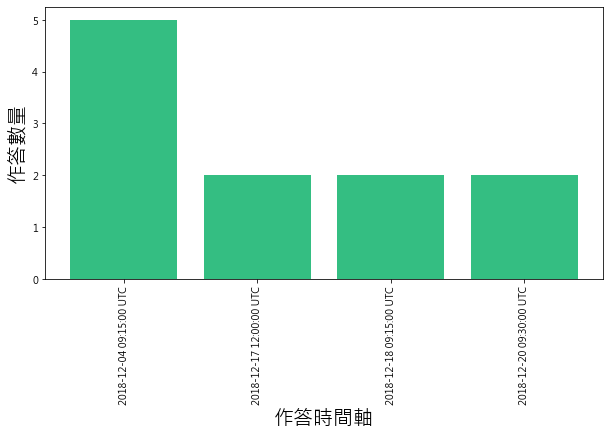

In [264]:
plt.figure(figsize=(10,5))
#plt.bar(correct_data["timestamp_TW"], correct_data["False"], color='#FF6D6D')
plt.bar(correct_data["timestamp_TW"], correct_data["True"], color='#34BE82')
plt.xticks(rotation=90)
plt.xlabel("作答時間軸",fontsize=20)
plt.ylabel("作答數量",fontsize=20)
plt.show()

In [265]:
import warnings
warnings.filterwarnings("ignore")

In [266]:
user_sample["colors"]=0
user_sample["colors"][user_sample.level==0]="#99FEFF"
user_sample["colors"][user_sample.level==1]="#94DAFF"
user_sample["colors"][user_sample.level==2]="#94B3FD"
user_sample["colors"][user_sample.level==3]="#6166B3"
user_sample["colors"][user_sample.level==4]="#B983FF"

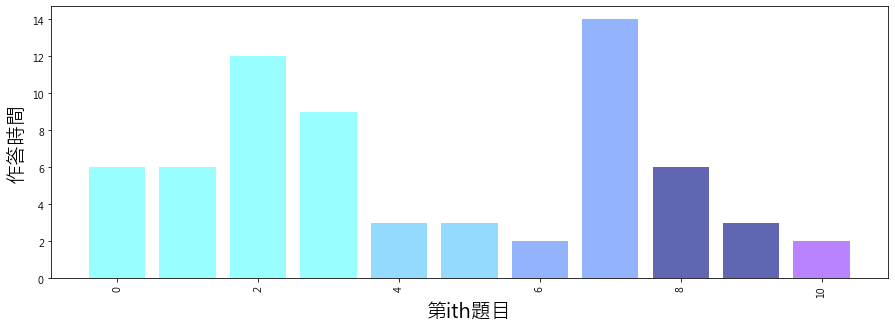

In [267]:
plt.figure(figsize=(15,5))
plt.bar(user_sample.index,user_sample["total_sec_taken"],color=user_sample["colors"])
plt.xticks(rotation=90)
plt.xlabel("第ith題目",fontsize=20)
plt.ylabel("作答時間",fontsize=20)
plt.show()

In [268]:
user_sample[user_sample.total_sec_taken>50]

,index,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,...,is_hint_used,is_downgrade,is_upgrade,level,gender,user_grade,user_city,points,badges_cnt,colors


In [269]:
user_sample.pivot_table(index=['timestamp_TW','is_correct'],columns='level' ,values=["total_sec_taken"], aggfunc={'level':'size',"total_sec_taken":np.mean}, fill_value=0).reset_index()

timestamp_TW is_correct level             total_sec_taken  \
level                                         0  1  2  3  4               0   
0      2018-12-04 09:15:00 UTC       True     4  1  0  0  0            8.25   
1      2018-12-17 12:00:00 UTC       True     0  1  1  0  0            0.00   
2      2018-12-18 09:15:00 UTC       True     0  0  1  1  0            0.00   
3      2018-12-20 09:30:00 UTC       True     0  0  0  1  1            0.00   

                    
level  1   2  3  4  
0      3   0  0  0  
1      3   2  0  0  
2      0  14  6  0  
3      0   0  3  2

In [270]:
user_sample.groupby("upid").agg({"uuid":"count","is_correct":np.mean,"total_sec_taken":np.mean,"total_attempt_cnt":np.mean}).reset_index().sort_values("total_sec_taken",ascending=False)

,upid,uuid,is_correct,total_sec_taken,total_attempt_cnt
10,sC+Ru6YbssD7bg/qDHwHRIqFmc834oeUREJrM3qN3K0=,1,1.00,14.00,1.00
2,ImGrp3R7EXLuFACfRiuvKW/DafVvzzVaCmh+KID0Mlw=,1,1.00,12.00,1.00
5,Q7kMXO7khoYhJdDAynSuCRQwEGgSlPs2wy7vxqOgaEk=,1,1.00,9.00,1.00
1,G1xHk65ELxpqBfGb+s8sDFq02DqvsDjp50DUjAhnvAo=,1,1.00,6.00,1.00
8,ejCYcHx+Jf7elcJc6n11FM5mQ6jVTk/ACKfBm8oFbwg=,1,1.00,6.00,1.00
9,fhEySqrY3eCu50evKk9RXmos1GhXxOi+fPmrGxnKFA8=,1,1.00,6.00,1.00
3,M2Fs94OVPFV+IlcsV9LJ1Y8LsY3aHt4yA9m1NVMV/n8=,1,1.00,3.00,1.00
6,TjxzlVyRjrApAJVe/QiPLrmsatc68d85f7tBx4wRYZU=,1,1.00,3.00,1.00
7,bZKUE/tiP+IqtkuEk0Kc8/x/kQsSSgGOHJppbbAIVKQ=,1,1.00,3.00,1.00
0,AGglFHtg2bkRsc9nuDwNKDyywXXfCG0OOQtxYoSrOt0=,1,1.00,2.00,1.00


In [271]:
user_sample[user_sample.upid=="QmmAyNaPprqPn7OqgUMFfJmiOEOGPeSeAnp9Mz/ewZk="]

,index,timestamp_TW,uuid,ucid,upid,problem_number,exercise_problem_repeat_session,is_correct,total_sec_taken,total_attempt_cnt,...,is_hint_used,is_downgrade,is_upgrade,level,gender,user_grade,user_city,points,badges_cnt,colors


# 使用者2(國小題目基礎/答錯率高)

In [272]:
user_sample=Log_Problem[(Log_Problem.ucid=="LCz/rIBPDjV+9tcB8P8On0xwPups1k9t8fcMBsc7rRs=")&(Log_Problem.uuid=="LNN65H+5vvNutAs1VepfSKGKK3ePz5sc4snss8F7ECU=")]

In [273]:
user_info(user_sample)

> 題目： ['LNN65H+5vvNutAs1VepfSKGKK3ePz5sc4snss8F7ECU=']
> 使用者標號： ['LCz/rIBPDjV+9tcB8P8On0xwPups1k9t8fcMBsc7rRs=']
> 年級： [4]
> 徽章數： [54]
> 能量數： [266536]
> 升級到精熟時間： 20 days 23:15:00
> 做題數量： 74
> 題庫題數： 20
> 答對率： 1.0
> 錯題總數： 0
> 使用提示： 45
> 使用提示： 29
> 退級次數： 0
> 升級次數： 3


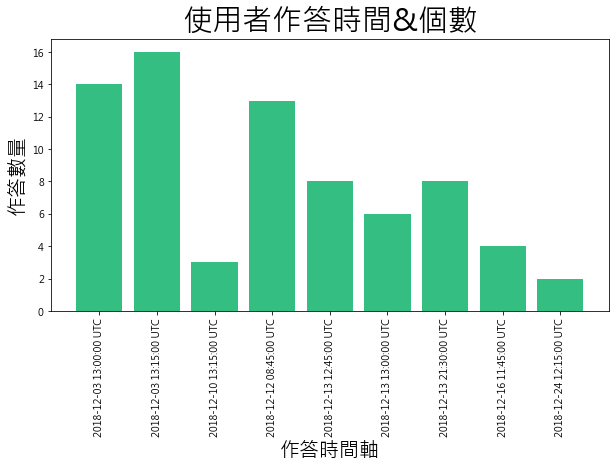

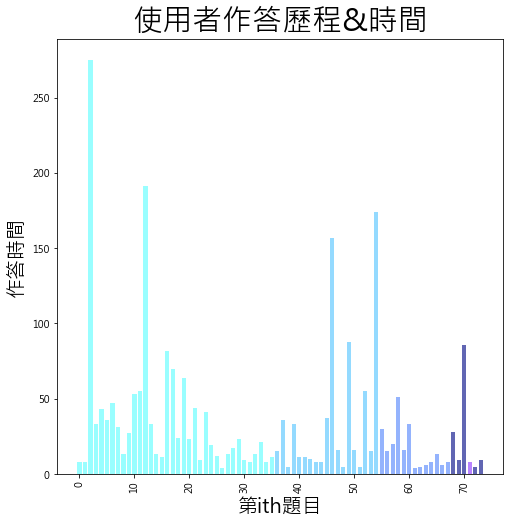

In [274]:
user_plt(user_sample)

In [275]:
user_table(user_sample)

**答錯歷程table：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level


**題目作答時間超過50秒的table：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
14528076,2018-12-03 13:00:00 UTC,w8SIg9pqyHugWEwnzwryvnmKkgP6NY+KfnK8ikGKACQ=,True,275,3,2,True,NaN,NaN,0
14527726,2018-12-03 13:00:00 UTC,sC+Ru6YbssD7bg/qDHwHRIqFmc834oeUREJrM3qN3K0=,True,53,1,0,False,NaN,NaN,0
14528574,2018-12-03 13:00:00 UTC,Mf42H5I0cR6H0qAsy4vXD+ptQnd3tUmoBcHUY4qcYmA=,True,55,1,0,False,NaN,NaN,0
14527798,2018-12-03 13:00:00 UTC,ejCYcHx+Jf7elcJc6n11FM5mQ6jVTk/ACKfBm8oFbwg=,True,191,3,2,True,NaN,NaN,0
14528426,2018-12-03 13:15:00 UTC,fL21MOcyD7km7ibIEbtOC7v/zDB3czAnf3OabTS5kj0=,True,82,4,3,True,NaN,NaN,0
14528419,2018-12-03 13:15:00 UTC,ImGrp3R7EXLuFACfRiuvKW/DafVvzzVaCmh+KID0Mlw=,True,70,3,2,True,NaN,NaN,0
14527994,2018-12-03 13:15:00 UTC,O7Zj2yC/2nXgH+J4mySVIa0x7ay7duDW/enCFQhbiJo=,True,64,1,0,False,NaN,NaN,0
14528643,2018-12-13 12:45:00 UTC,w8SIg9pqyHugWEwnzwryvnmKkgP6NY+KfnK8ikGKACQ=,True,157,1,0,False,NaN,NaN,1
14528463,2018-12-13 12:45:00 UTC,G1xHk65ELxpqBfGb+s8sDFq02DqvsDjp50DUjAhnvAo=,True,88,4,2,True,NaN,NaN,1
14528308,2018-12-13 12:45:00 UTC,sC+Ru6YbssD7bg/qDHwHRIqFmc834oeUREJrM3qN3K0=,True,55,4,1,True,NaN,NaN,1


**升級/答錯&答錯/作答時間table：


level              total_sec_taken         \
level                                  0   1  2  3  4               0      1   
timestamp_TW            is_correct                                             
2018-12-03 13:00:00 UTC True          14   0  0  0  0           60.93   0.00   
2018-12-03 13:15:00 UTC True          16   0  0  0  0           29.31   0.00   
2018-12-10 13:15:00 UTC True           3   0  0  0  0           10.00   0.00   
2018-12-12 08:45:00 UTC True           3  10  0  0  0           13.33  17.40   
2018-12-13 12:45:00 UTC True           0   8  0  0  0            0.00  44.62   
2018-12-13 13:00:00 UTC True           0   1  5  0  0            0.00 174.00   
2018-12-13 21:30:00 UTC True           0   0  8  0  0            0.00   0.00   
2018-12-16 11:45:00 UTC True           0   0  0  3  1            0.00   0.00   
2018-12-24 12:15:00 UTC True           0   0  0  2  0            0.00   0.00   

                                                 
level                                  2   3  4  
timestamp_TW            is_correct               
2018-12-03 13:00:00 UTC True        0.00   0  0  
2018-12-03 13:15:00 UTC True        0.00   0  0  
2018-12-10 13:15:00 UTC True        0.00   0  0  
2018-12-12 08:45:00 UTC True        0.00   0  0  
2018-12-13 12:45:00 UTC True        0.00   0  0  
2018-12-13 13:00:00 UTC True       26.40   0  0  
2018-12-13 21:30:00 UTC True       10.38   0  0  
2018-12-16 11:45:00 UTC True        0.00  41  8  
2018-12-24 12:15:00 UTC True        0.00   7  0

**該單元各小題作答狀況table：


,upid,is_correct,total_sec_taken,total_attempt_cnt
14,ejCYcHx+Jf7elcJc6n11FM5mQ6jVTk/ACKfBm8oFbwg=,1.00,117.00,1.50
19,w8SIg9pqyHugWEwnzwryvnmKkgP6NY+KfnK8ikGKACQ=,1.00,113.50,1.50
3,G1xHk65ELxpqBfGb+s8sDFq02DqvsDjp50DUjAhnvAo=,1.00,49.33,2.67
4,ImGrp3R7EXLuFACfRiuvKW/DafVvzzVaCmh+KID0Mlw=,1.00,45.33,2.67
2,FpedADgd33WBLOEhigbm9d/AnPwmryQ8/w2qGWbPeRE=,1.00,43.50,1.00
8,O7Zj2yC/2nXgH+J4mySVIa0x7ay7duDW/enCFQhbiJo=,1.00,43.33,1.00
18,sC+Ru6YbssD7bg/qDHwHRIqFmc834oeUREJrM3qN3K0=,1.00,43.00,2.00
7,Mf42H5I0cR6H0qAsy4vXD+ptQnd3tUmoBcHUY4qcYmA=,1.00,30.50,2.00
9,OpV3aBi+jm7bi8IVppRnrVcaJrITeadn2XdxrD1+7Co=,1.00,30.50,2.00
15,fL21MOcyD7km7ibIEbtOC7v/zDB3czAnf3OabTS5kj0=,1.00,29.75,3.50


**花最多時間的小題tablel：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
14527798,2018-12-03 13:00:00 UTC,ejCYcHx+Jf7elcJc6n11FM5mQ6jVTk/ACKfBm8oFbwg=,True,191,3,2,True,NaN,NaN,0
14528033,2018-12-03 13:15:00 UTC,ejCYcHx+Jf7elcJc6n11FM5mQ6jVTk/ACKfBm8oFbwg=,True,17,1,2,True,NaN,NaN,0
14527934,2018-12-13 13:00:00 UTC,ejCYcHx+Jf7elcJc6n11FM5mQ6jVTk/ACKfBm8oFbwg=,True,174,1,0,False,NaN,NaN,1
14528612,2018-12-16 11:45:00 UTC,ejCYcHx+Jf7elcJc6n11FM5mQ6jVTk/ACKfBm8oFbwg=,True,86,1,0,False,NaN,NaN,3


# 使用者3 (國小題目hard/答對率高)

In [492]:
user_sample=Log_Problem[(Log_Problem.ucid=="RtjkuNmuzBI2VhWYRk43wMkzhzIQD6YstXG1ZsypAZU=")&(Log_Problem.uuid=="aq7pVQJMk514YRibcCYVx5/+ThMDoHa2Ge+tiBx6iYk=")]

In [493]:
user_info(user_sample)

> 題目： ['aq7pVQJMk514YRibcCYVx5/+ThMDoHa2Ge+tiBx6iYk=']
> 使用者標號： ['RtjkuNmuzBI2VhWYRk43wMkzhzIQD6YstXG1ZsypAZU=']
> 年級： [6]
> 徽章數： [52]
> 能量數： [1264646]
> 升級到精熟時間： 9 days 01:30:00
> 做題數量： 11
> 題庫題數： 11
> 答對率： 1.0
> 錯題總數： 0
> 使用提示： 0
> 使用提示： 0
> 退級次數： 0
> 升級次數： 4


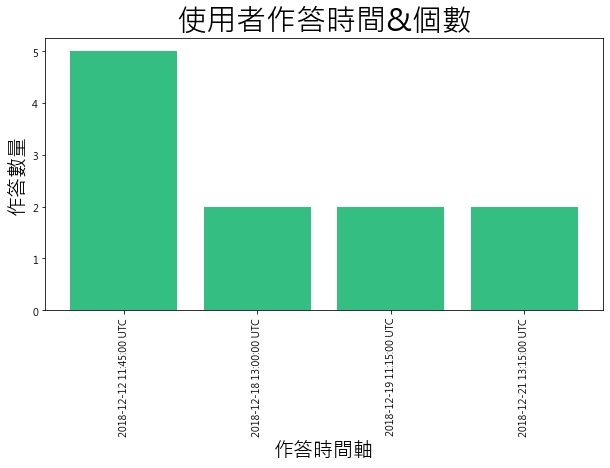

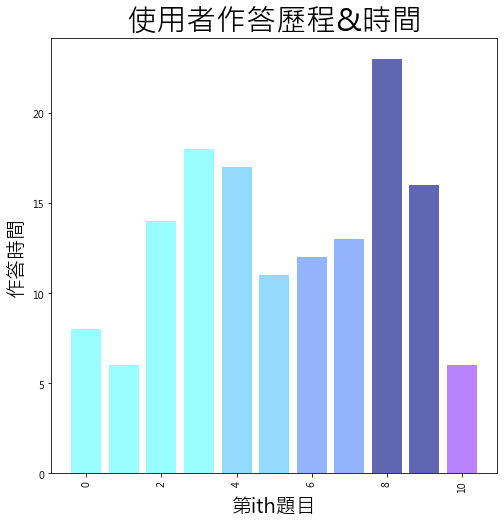

In [494]:
user_plt(user_sample)

In [495]:
user_table(user_sample)

**答錯歷程table：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level


**題目作答時間超過50秒的table：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level


**升級/答錯&答錯/作答時間table：


level             total_sec_taken          \
level                                  0  1  2  3  4               0   1   2   
timestamp_TW            is_correct                                             
2018-12-12 11:45:00 UTC True           4  1  0  0  0            11.5  17   0   
2018-12-18 13:00:00 UTC True           0  1  1  0  0             0.0  11  12   
2018-12-19 11:15:00 UTC True           0  0  1  1  0             0.0   0  13   
2018-12-21 13:15:00 UTC True           0  0  0  1  1             0.0   0   0   

                                           
level                                3  4  
timestamp_TW            is_correct         
2018-12-12 11:45:00 UTC True         0  0  
2018-12-18 13:00:00 UTC True         0  0  
2018-12-19 11:15:00 UTC True        23  0  
2018-12-21 13:15:00 UTC True        16  6

**該單元各小題作答狀況table：


,upid,is_correct,total_sec_taken,total_attempt_cnt
6,P3s3xAot9d515nR466lz3M1CSGTlA0kWvNUYM4wIKm8=,1.0,23.0,1.0
0,3s8y9uecxEynWDOB2VaPXze/UMEfCZki3RragDcCk+A=,1.0,18.0,1.0
10,pXAi+pwqrVhHZMfFrfTr7Avd7HQ7U4YenaG+otA1tK4=,1.0,17.0,1.0
7,Tjut9SQthH2R5SHLT7n2V+v8uW90DVLpJJGN3m0awhM=,1.0,16.0,1.0
5,NBqE/FT2EqaT0O3CcTENhbIaLh/aAMHx8Cg82vvlwPI=,1.0,14.0,1.0
2,B1llgHpwSKDilevztsCdR24HuQxdr8yqh8YY8pxD62s=,1.0,13.0,1.0
4,MkSqk2yxwXtALC0htD3bqbsk4S+hyDn36QOWUYP46jE=,1.0,12.0,1.0
1,9pR/89TQsCFdv5NB/53nVJEyMhuuICM4juLmdrHULfk=,1.0,11.0,1.0
8,WDtXMXP+dK/bNn9Q1qoZ0eZOu+LOZ556UAfX25gjrk0=,1.0,8.0,1.0
3,IJrDIbyNhV8FHT7Heh0r8E1o/zt+U4on1q5cW1BEyzg=,1.0,6.0,1.0


**花最多時間的小題tablel：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
14483688,2018-12-19 11:15:00 UTC,P3s3xAot9d515nR466lz3M1CSGTlA0kWvNUYM4wIKm8=,True,23,1,0,False,False,True,3


# 使用者4 (國小題目hard/答錯率高)

In [504]:
user_sample=Log_Problem[(Log_Problem.ucid=="RtjkuNmuzBI2VhWYRk43wMkzhzIQD6YstXG1ZsypAZU=")&(Log_Problem.uuid=="MqXXmq5N2yIbY7S4IfzwHrJnPNKbgDl4cSBKrDvalwU=")]

In [505]:
user_info(user_sample)

> 題目： ['MqXXmq5N2yIbY7S4IfzwHrJnPNKbgDl4cSBKrDvalwU=']
> 使用者標號： ['RtjkuNmuzBI2VhWYRk43wMkzhzIQD6YstXG1ZsypAZU=']
> 年級： [6]
> 徽章數： [41]
> 能量數： [1381914]
> 升級到精熟時間： 14 days 22:15:00
> 做題數量： 34
> 題庫題數： 18
> 答對率： 0.5588
> 錯題總數： 15
> 使用提示： 14
> 使用提示： 15
> 退級次數： 0
> 升級次數： 4


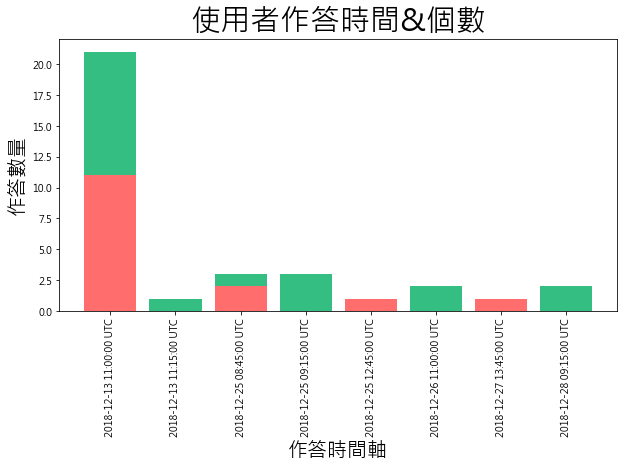

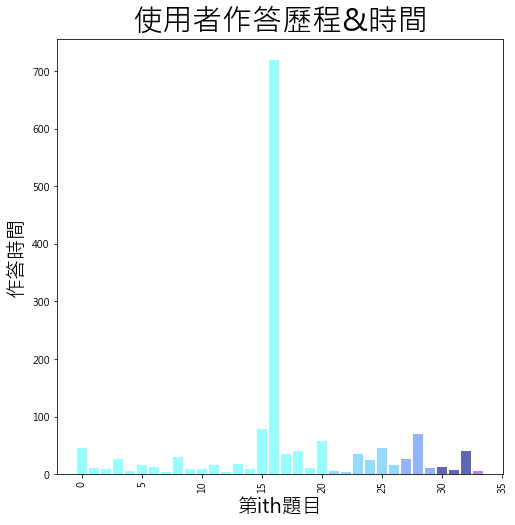

In [506]:
user_plt(user_sample)

In [507]:
user_table(user_sample)

**答錯歷程table：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
14342741,2018-12-13 11:00:00 UTC,0Kr1cUV7t1nvfNfztcBm8PPvOM2TXTr4z+VEi11+lN8=,False,46,2,2,True,NaN,NaN,0
14343860,2018-12-25 12:45:00 UTC,NBqE/FT2EqaT0O3CcTENhbIaLh/aAMHx8Cg82vvlwPI=,False,69,2,0,False,NaN,NaN,2
14344593,2018-12-13 11:00:00 UTC,NBqE/FT2EqaT0O3CcTENhbIaLh/aAMHx8Cg82vvlwPI=,False,26,2,2,True,NaN,NaN,0
14344782,2018-12-13 11:00:00 UTC,oXiAP9Q/2iYFToDdIDks1An/jxysdUhd/w7KUOqK+ck=,False,6,2,0,False,NaN,NaN,0
14344783,2018-12-13 11:00:00 UTC,pXAi+pwqrVhHZMfFrfTr7Avd7HQ7U4YenaG+otA1tK4=,False,16,3,0,False,NaN,NaN,0
14344799,2018-12-13 11:00:00 UTC,IJrDIbyNhV8FHT7Heh0r8E1o/zt+U4on1q5cW1BEyzg=,False,13,3,0,False,NaN,NaN,0
14344804,2018-12-27 13:45:00 UTC,oXiAP9Q/2iYFToDdIDks1An/jxysdUhd/w7KUOqK+ck=,False,7,3,0,False,NaN,NaN,3
14345291,2018-12-13 11:00:00 UTC,u1REfDG0kKv9otyVdNe1weaP1u9wMC8b/kTgS3zrnhU=,False,29,2,0,False,NaN,NaN,0
14345335,2018-12-13 11:00:00 UTC,krjiSaCkWfkHHtoMZw8MwUOGUArTg3WSGQ7waM0J7yA=,False,8,2,0,False,NaN,NaN,0
14345490,2018-12-13 11:00:00 UTC,9pR/89TQsCFdv5NB/53nVJEyMhuuICM4juLmdrHULfk=,False,16,3,2,True,NaN,NaN,0


**題目作答時間超過50秒的table：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
14343860,2018-12-25 12:45:00 UTC,NBqE/FT2EqaT0O3CcTENhbIaLh/aAMHx8Cg82vvlwPI=,False,69,2,0,False,NaN,NaN,2
14346329,2018-12-13 11:00:00 UTC,3s8y9uecxEynWDOB2VaPXze/UMEfCZki3RragDcCk+A=,True,79,1,0,False,NaN,NaN,0
14346868,2018-12-13 11:00:00 UTC,Njm0p57BXmr+J6/tOXOFGrpuuqfeYsan92MAPbgWMY0=,False,720,6,2,True,NaN,NaN,0
14347800,2018-12-13 11:00:00 UTC,P3s3xAot9d515nR466lz3M1CSGTlA0kWvNUYM4wIKm8=,True,58,1,0,False,NaN,NaN,0


**升級/答錯&答錯/作答時間table：


level             total_sec_taken          \
level                                  0  1  2  3  4               0   1   2   
timestamp_TW            is_correct                                             
2018-12-13 11:00:00 UTC False         11  0  0  0  0       85.181818   0   0   
                        True          10  0  0  0  0       22.700000   0   0   
2018-12-13 11:15:00 UTC True           0  1  0  0  0        0.000000   6   0   
2018-12-25 08:45:00 UTC False          0  2  0  0  0        0.000000  29   0   
                        True           0  1  0  0  0        0.000000   4   0   
2018-12-25 09:15:00 UTC True           0  2  1  0  0        0.000000  30  27   
2018-12-25 12:45:00 UTC False          0  0  1  0  0        0.000000   0  69   
2018-12-26 11:00:00 UTC True           0  0  1  1  0        0.000000   0  10   
2018-12-27 13:45:00 UTC False          0  0  0  1  0        0.000000   0   0   
2018-12-28 09:15:00 UTC True           0  0  0  1  1        0.000000   0   0   

                                           
level                                3  4  
timestamp_TW            is_correct         
2018-12-13 11:00:00 UTC False        0  0  
                        True         0  0  
2018-12-13 11:15:00 UTC True         0  0  
2018-12-25 08:45:00 UTC False        0  0  
                        True         0  0  
2018-12-25 09:15:00 UTC True         0  0  
2018-12-25 12:45:00 UTC False        0  0  
2018-12-26 11:00:00 UTC True        12  0  
2018-12-27 13:45:00 UTC False        7  0  
2018-12-28 09:15:00 UTC True        40  6

**該單元各小題作答狀況table：


,upid,is_correct,total_sec_taken,total_attempt_cnt
7,Njm0p57BXmr+J6/tOXOFGrpuuqfeYsan92MAPbgWMY0=,0.000000,380.0,4.0
8,P3s3xAot9d515nR466lz3M1CSGTlA0kWvNUYM4wIKm8=,1.000000,58.0,1.0
1,3s8y9uecxEynWDOB2VaPXze/UMEfCZki3RragDcCk+A=,0.500000,51.5,2.0
6,NBqE/FT2EqaT0O3CcTENhbIaLh/aAMHx8Cg82vvlwPI=,0.000000,47.5,2.0
0,0Kr1cUV7t1nvfNfztcBm8PPvOM2TXTr4z+VEi11+lN8=,0.500000,45.5,1.5
14,mSYdhQwV6r2u9rOufLoJ3ka1aczxlE4GMqcPPoqxl5s=,1.000000,37.0,1.0
2,9pR/89TQsCFdv5NB/53nVJEyMhuuICM4juLmdrHULfk=,0.000000,25.0,2.5
16,pXAi+pwqrVhHZMfFrfTr7Avd7HQ7U4YenaG+otA1tK4=,0.500000,21.5,2.0
17,u1REfDG0kKv9otyVdNe1weaP1u9wMC8b/kTgS3zrnhU=,0.500000,17.5,1.5
4,IJrDIbyNhV8FHT7Heh0r8E1o/zt+U4on1q5cW1BEyzg=,0.333333,14.0,2.0


**花最多時間的小題tablel：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
14346868,2018-12-13 11:00:00 UTC,Njm0p57BXmr+J6/tOXOFGrpuuqfeYsan92MAPbgWMY0=,False,720,6,2,True,NaN,NaN,0
14347461,2018-12-13 11:00:00 UTC,Njm0p57BXmr+J6/tOXOFGrpuuqfeYsan92MAPbgWMY0=,False,40,2,2,True,NaN,NaN,0


In [510]:
user_sample=Log_Problem[(Log_Problem.ucid=="65YgA0ahggSdeaYBdRl82v/AO+pGzmZFqsi8TTDiP3Y=")&(Log_Problem.uuid=="MqXXmq5N2yIbY7S4IfzwHrJnPNKbgDl4cSBKrDvalwU=")]

In [511]:
user_info(user_sample)

> 題目： ['MqXXmq5N2yIbY7S4IfzwHrJnPNKbgDl4cSBKrDvalwU=']
> 使用者標號： ['65YgA0ahggSdeaYBdRl82v/AO+pGzmZFqsi8TTDiP3Y=']
> 年級： [6]
> 徽章數： [41]
> 能量數： [1381914]
> 升級到精熟時間： 13 days 09:15:00
> 做題數量： 26
> 題庫題數： 16
> 答對率： 0.9231
> 錯題總數： 2
> 使用提示： 5
> 使用提示： 2
> 退級次數： 0
> 升級次數： 4


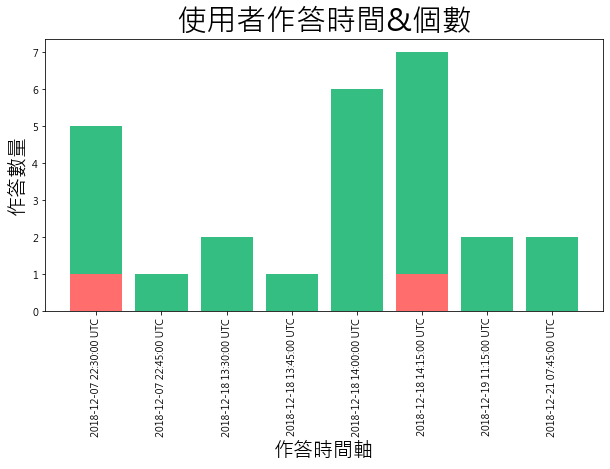

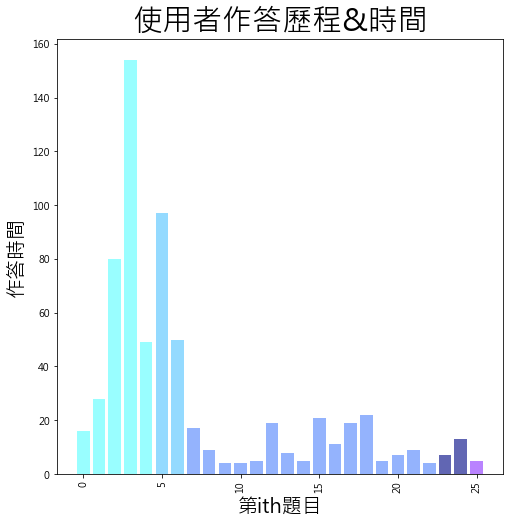

In [512]:
user_plt(user_sample)

In [513]:
user_table(user_sample)

**答錯歷程table：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
14343933,2018-12-18 14:15:00 UTC,V3vkQvizxqHSh0tmebt0z9A4vaV6arSmShm6zNUBk50=,False,19,2,3,True,NaN,NaN,2
14344934,2018-12-07 22:30:00 UTC,3xQsfxcas5cn6Fil/eapuBQhAdVxurROesyi2P6jK/A=,False,80,2,2,True,NaN,NaN,0


**題目作答時間超過50秒的table：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
14343771,2018-12-07 22:45:00 UTC,JjWuxX+Dp4Y9s30BGgiO+CGjcpOSWuSA5WM3y8ObV88=,True,97,1,0,False,False,True,1
14344934,2018-12-07 22:30:00 UTC,3xQsfxcas5cn6Fil/eapuBQhAdVxurROesyi2P6jK/A=,False,80,2,2,True,NaN,NaN,0
14347061,2018-12-07 22:30:00 UTC,+y2oEea3gO9BoOlbko5k9/oLrG8fUyjt8mJgQSc6Zs8=,True,154,1,0,False,NaN,NaN,0


**升級/答錯&答錯/作答時間table：


level             total_sec_taken      \
level                                  0  1  2  3  4               0   1   
timestamp_TW            is_correct                                         
2018-12-07 22:30:00 UTC False          1  0  0  0  0           80.00   0   
                        True           4  0  0  0  0           61.75   0   
2018-12-07 22:45:00 UTC True           0  1  0  0  0            0.00  97   
2018-12-18 13:30:00 UTC True           0  1  1  0  0            0.00  50   
2018-12-18 13:45:00 UTC True           0  0  1  0  0            0.00   0   
2018-12-18 14:00:00 UTC True           0  0  6  0  0            0.00   0   
2018-12-18 14:15:00 UTC False          0  0  1  0  0            0.00   0   
                        True           0  0  6  0  0            0.00   0   
2018-12-19 11:15:00 UTC True           0  0  1  1  0            0.00   0   
2018-12-21 07:45:00 UTC True           0  0  0  1  1            0.00   0   

                                                 
level                                  2   3  4  
timestamp_TW            is_correct               
2018-12-07 22:30:00 UTC False        0.0   0  0  
                        True         0.0   0  0  
2018-12-07 22:45:00 UTC True         0.0   0  0  
2018-12-18 13:30:00 UTC True        17.0   0  0  
2018-12-18 13:45:00 UTC True         9.0   0  0  
2018-12-18 14:00:00 UTC True         7.5   0  0  
2018-12-18 14:15:00 UTC False       19.0   0  0  
                        True        12.5   0  0  
2018-12-19 11:15:00 UTC True         4.0   7  0  
2018-12-21 07:45:00 UTC True         0.0  13  5

**該單元各小題作答狀況table：


,upid,is_correct,total_sec_taken,total_attempt_cnt
0,+y2oEea3gO9BoOlbko5k9/oLrG8fUyjt8mJgQSc6Zs8=,1.0,154.0,1.0
8,JjWuxX+Dp4Y9s30BGgiO+CGjcpOSWuSA5WM3y8ObV88=,1.0,52.0,1.0
1,3xQsfxcas5cn6Fil/eapuBQhAdVxurROesyi2P6jK/A=,0.5,44.5,1.5
6,CRM/X2dkyxMVaKGUN8K4K/Vv67ZeUIDyNVzRwaDbzZQ=,1.0,35.5,1.0
7,DzBAuk08F2ttS0SAVU21HPRgQqbfbdyMDdjcPQEc9nY=,1.0,28.0,1.0
15,yqIJLqqU6/TQSLTUP3JD3IEQYkKkcORvcKjT+1/df94=,1.0,27.0,1.0
5,B4NNZ6x8qua9BL84E0FtqXmduT3Q/i0wb2l2tXBboLM=,1.0,22.0,1.0
9,V3vkQvizxqHSh0tmebt0z9A4vaV6arSmShm6zNUBk50=,0.5,19.0,1.5
12,rmJ0wSN88GGdFI9UZf6q5B3Nz4xs/kCO3MVND4EzQgc=,1.0,12.0,1.0
4,9cLfZAKdjwjsjv2utVBAhIdTmTfMXVus9Mbj+WSc2O0=,1.0,11.0,1.0


**花最多時間的小題tablel：


,timestamp_TW,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level
14347061,2018-12-07 22:30:00 UTC,+y2oEea3gO9BoOlbko5k9/oLrG8fUyjt8mJgQSc6Zs8=,True,154,1,0,False,NaN,NaN,0


# function

In [250]:
def user_info(user_sample):
    print("> 題目：",user_sample["uuid"].unique())
    print("> 使用者標號：",user_sample["ucid"].unique())
    print("> 年級：",user_sample["user_grade"].unique())
    print("> 徽章數：",user_sample["badges_cnt"].unique())
    print("> 能量數：",user_sample["points"].unique())
    print("> 升級到精熟時間：",pd.to_datetime(user_sample["timestamp_TW"].max())-pd.to_datetime(user_sample["timestamp_TW"].min()))
    print("> 做題數量：",user_sample["uuid"].count())
    print("> 題庫題數：",len(user_sample["upid"].unique()))
    print("> 答對率：",round(user_sample.is_correct.mean(),4))
    print("> 錯題總數：",user_sample.is_correct[user_sample.is_correct==0].count())
    print("> 使用提示：",user_sample["used_hint_cnt"].sum())
    print("> 使用提示：",user_sample.total_attempt_cnt[user_sample.total_attempt_cnt>1].count())
    print("> 退級次數：",user_sample["is_downgrade"].sum())
    print("> 升級次數：",user_sample["is_upgrade"].sum())

In [248]:
def user_plt(user_sample):
    import warnings
    warnings.filterwarnings("ignore")
    #plot1
    user_sample=user_sample.sort_values(["timestamp_TW","exercise_problem_repeat_session"]).reset_index()
    if (user_sample.is_correct.mean()!=1):
        correct_data=user_sample.pivot_table(index=['timestamp_TW'],columns='is_correct',aggfunc={'level':'size'},fill_value=0).reset_index()
        correct_data.columns=["timestamp_TW","False","True"]
        plt.figure(figsize=(10,5))
        plt.bar(correct_data["timestamp_TW"], correct_data["False"], color='#FF6D6D')
        plt.bar(correct_data["timestamp_TW"], correct_data["True"], bottom=correct_data["False"], color='#34BE82')
        plt.xticks(rotation=90)
        plt.title("使用者作答時間&個數",fontsize=30)
        plt.xlabel("作答時間軸",fontsize=20)
        plt.ylabel("作答數量",fontsize=20)
        plt.show()
    else:
        correct_data=user_sample.pivot_table(index=['timestamp_TW'],columns='is_correct',aggfunc={'level':'size'},fill_value=0).reset_index()
        correct_data.columns=["timestamp_TW","True"]
        plt.figure(figsize=(10,5))
        plt.bar(correct_data["timestamp_TW"], correct_data["True"], color='#34BE82')
        plt.xticks(rotation=90)
        plt.title("使用者作答時間&個數",fontsize=30)
        plt.xlabel("作答時間軸",fontsize=20)
        plt.ylabel("作答數量",fontsize=20)
        plt.show()
        
    print()
    
    #plot2
    user_sample["colors"]=0
    user_sample["colors"][user_sample.level==0]="#99FEFF"
    user_sample["colors"][user_sample.level==1]="#94DAFF"
    user_sample["colors"][user_sample.level==2]="#94B3FD"
    user_sample["colors"][user_sample.level==3]="#6166B3"
    user_sample["colors"][user_sample.level==4]="#B983FF"
    
    plt.bar(user_sample.index,user_sample["total_sec_taken"],color=user_sample["colors"])
    plt.xticks(rotation=90)
    plt.title("使用者作答歷程&時間",fontsize=30)
    plt.xlabel("第ith題目",fontsize=20)
    plt.ylabel("作答時間",fontsize=20)
    plt.show()

In [249]:
def user_table(user_sample):
    user_sample=user_sample[["timestamp_TW","upid","is_correct","total_sec_taken","total_attempt_cnt","used_hint_cnt","is_hint_used","is_downgrade","is_upgrade","level"]]
    print("=========================================================================")
    print("**答錯歷程table：")
    print("=========================================================================")
    display(user_sample[user_sample.is_correct==False])
    print("=========================================================================")
    print("**題目作答時間超過50秒的table：")
    print("=========================================================================")
    display(user_sample[user_sample.total_sec_taken>50])
    print("=========================================================================")
    print("**升級/答錯&答錯/作答時間table：")
    print("=========================================================================")
    display(user_sample.pivot_table(index=['timestamp_TW','is_correct'],columns='level' ,values=["total_sec_taken"], aggfunc={'level':'size',"total_sec_taken":np.mean}, fill_value=0))
    qid_table=user_sample.groupby("upid").agg({"is_correct":"count","is_correct":np.mean,"total_sec_taken":np.mean,"total_attempt_cnt":np.mean}).reset_index().sort_values("total_sec_taken",ascending=False)
    print("=========================================================================")
    print("**該單元各小題作答狀況table：")
    print("=========================================================================")
    display(qid_table)
    print("=========================================================================")
    print("**花最多時間的小題tablel：")
    print("=========================================================================")
    display(user_sample[user_sample.upid==qid_table.upid.iloc[0]])

# 其他發想題目

1. 存活率(離開均一)/離開時間/回來均一

(1) 如何定義離開均一

(2) 如何清洗資料

(3) 受外在因素太大（學校因素）

2. 每個人客製化的難易度

In [591]:
data_all.describe()

,Unnamed: 0,uuid,upid,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,points,badges_cnt,level0,level1,level2,level3,level4,grade_1,grade_2,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
count,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000,1326.000000
mean,662.500000,12230.249623,20.040724,0.654001,50.697389,2.003834,0.624219,300818.870468,45.068048,8905.821267,1774.259427,751.748869,566.684766,231.735294,118.441176,178.042232,1514.724736,1810.760935,3511.785822,1900.824284,1660.868024,822.998492,478.628205,112.837104,63.828808,56.509804
std,382.927539,11724.428987,7.189500,0.136541,24.505807,0.492950,0.457582,78030.101420,13.935810,7052.902486,2339.417914,1203.071271,1064.629266,539.591559,713.386414,652.030853,3621.100341,3186.019169,5493.960585,2768.588929,3136.336362,1531.132721,714.096219,135.769702,76.246453,73.736847
min,0.000000,208.000000,3.000000,0.211018,6.226888,1.054983,0.018631,126631.280035,22.321331,125.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,331.250000,4741.000000,16.000000,0.552119,32.987324,1.646960,0.297077,247645.268562,35.910782,3926.750000,497.500000,161.000000,90.250000,28.000000,5.000000,1.000000,13.000000,18.000000,60.000000,126.000000,146.000000,43.000000,44.000000,27.000000,19.000000,11.000000
50%,662.500000,10042.000000,18.000000,0.662448,45.965261,1.946296,0.509776,301422.739693,41.325284,7754.000000,1218.000000,415.000000,264.500000,95.000000,27.000000,25.000000,60.000000,144.000000,1072.000000,931.500000,358.000000,123.500000,170.000000,66.000000,45.000000,35.000000
75%,993.750000,16237.500000,21.000000,0.754940,62.859225,2.298568,0.826096,346327.692808,49.533641,12154.000000,2259.750000,924.750000,664.000000,245.000000,60.000000,109.750000,318.000000,2535.500000,4234.750000,2325.500000,1276.750000,811.000000,609.250000,141.000000,85.000000,76.000000
max,1325.000000,138169.000000,67.000000,0.964203,168.567308,4.579574,4.300115,751485.989130,130.824825,72984.000000,31185.000000,15965.000000,15159.000000,8148.000000,9186.000000,10742.000000,21431.000000,20843.000000,35330.000000,20865.000000,26549.000000,10019.000000,5100.000000,1140.000000,918.000000,699.000000
